### IMPORTS AND HELPER FUNCTIONS

In [63]:
## IMPORTS
import requests
import pandas as pd
from datetime import datetime
import os
import tweepy as tw
import json
import pprint
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import numpy as np
from os import listdir
from os.path import isfile, join
from math import pi
import pandas as pd
from bokeh.io import output_file, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
from unicodedata import *

## CONSTANTS
script_data = {
"names":['Common', 'Latin', 'Greek', 'Cyrillic', 'Armenian', 'Hebrew', 'Arabic',
'Syriac', 'Thaana', 'Devanagari', 'Bengali', 'Gurmukhi', 'Gujarati', 'Oriya',
'Tamil', 'Telugu', 'Kannada', 'Malayalam', 'Sinhala', 'Thai', 'Lao', 'Tibetan',
'Myanmar', 'Georgian', 'Hangul', 'Ethiopic', 'Cherokee', 'Canadian_Aboriginal',
'Ogham', 'Runic', 'Khmer', 'Mongolian', 'Hiragana', 'Katakana', 'Bopomofo',
'Han', 'Yi', 'Old_Italic', 'Gothic', 'Deseret', 'Inherited', 'Tagalog',
'Hanunoo', 'Buhid', 'Tagbanwa', 'Limbu', 'Tai_Le', 'Linear_B', 'Ugaritic',
'Shavian', 'Osmanya', 'Cypriot', 'Braille', 'Buginese', 'Coptic', 'New_Tai_Lue',
'Glagolitic', 'Tifinagh', 'Syloti_Nagri', 'Old_Persian', 'Kharoshthi',
'Balinese', 'Cuneiform', 'Phoenician', 'Phags_Pa', 'Nko', 'Sundanese', 'Lepcha',
'Ol_Chiki', 'Vai', 'Saurashtra', 'Kayah_Li', 'Rejang', 'Lycian', 'Carian',
'Lydian', 'Cham', 'Tai_Tham', 'Tai_Viet', 'Avestan', 'Egyptian_Hieroglyphs',
'Samaritan', 'Lisu', 'Bamum', 'Javanese', 'Meetei_Mayek', 'Imperial_Aramaic',
'Old_South_Arabian', 'Inscriptional_Parthian', 'Inscriptional_Pahlavi',
'Old_Turkic', 'Kaithi', 'Batak', 'Brahmi', 'Mandaic', 'Chakma',
'Meroitic_Cursive', 'Meroitic_Hieroglyphs', 'Miao', 'Sharada', 'Sora_Sompeng',
'Takri'],
"cats":['Cc', 'Zs', 'Po', 'Sc', 'Ps', 'Pe', 'Sm', 'Pd', 'Nd', 'Sk', 'Pc', 'So', 'Pi',
'Cf', 'No', 'L', 'Pf', 'Lm', 'Mc', 'Lo', 'Zl', 'Zp', 'Nl', 'Mn', 'Me'],
"idx":[
(0x0,0x1f,0,0), (0x20,0x20,0,1), (0x21,0x23,0,2), (0x24,0x24,0,3),
(0x25,0x27,0,2), (0x28,0x28,0,4), (0x29,0x29,0,5), (0x2a,0x2a,0,2),
(0x2b,0x2b,0,6), (0x2c,0x2c,0,2), (0x2d,0x2d,0,7), (0x2e,0x2f,0,2),
(0x30,0x39,0,8), (0x3a,0x3b,0,2), (0x3c,0x3e,0,6), (0x3f,0x40,0,2),
(0x41,0x5a,1,15), (0x5b,0x5b,0,4), (0x5c,0x5c,0,2), (0x5d,0x5d,0,5),
(0x5e,0x5e,0,9), (0x5f,0x5f,0,10), (0x60,0x60,0,9), (0x61,0x7a,1,15),
(0x7b,0x7b,0,4), (0x7c,0x7c,0,6), (0x7d,0x7d,0,5), (0x7e,0x7e,0,6),
(0x7f,0x9f,0,0), (0xa0,0xa0,0,1), (0xa1,0xa1,0,2), (0xa2,0xa5,0,3),
(0xa6,0xa6,0,11), (0xa7,0xa7,0,2), (0xa8,0xa8,0,9), (0xa9,0xa9,0,11),
(0xaa,0xaa,1,19), (0xab,0xab,0,12), (0xac,0xac,0,6), (0xad,0xad,0,13),
(0xae,0xae,0,11), (0xaf,0xaf,0,9), (0xb0,0xb0,0,11), (0xb1,0xb1,0,6),
(0xb2,0xb3,0,14), (0xb4,0xb4,0,9), (0xb5,0xb5,0,15), (0xb6,0xb7,0,2),
(0xb8,0xb8,0,9), (0xb9,0xb9,0,14), (0xba,0xba,1,19), (0xbb,0xbb,0,16),
(0xbc,0xbe,0,14), (0xbf,0xbf,0,2), (0xc0,0xd6,1,15), (0xd7,0xd7,0,6),
(0xd8,0xf6,1,15), (0xf7,0xf7,0,6), (0xf8,0x1ba,1,15), (0x1bb,0x1bb,1,19),
(0x1bc,0x1bf,1,15), (0x1c0,0x1c3,1,19), (0x1c4,0x293,1,15), (0x294,0x294,1,19),
(0x295,0x2af,1,15), (0x2b0,0x2b8,1,17), (0x2b9,0x2c1,0,17), (0x2c2,0x2c5,0,9),
(0x2c6,0x2d1,0,17), (0x2d2,0x2df,0,9), (0x2e0,0x2e4,1,17), (0x2e5,0x2e9,0,9),
(0x2ea,0x2eb,34,9), (0x2ec,0x2ec,0,17), (0x2ed,0x2ed,0,9), (0x2ee,0x2ee,0,17),
(0x2ef,0x2ff,0,9), (0x300,0x36f,40,23), (0x370,0x373,2,15), (0x374,0x374,0,17),
(0x375,0x375,2,9), (0x376,0x377,2,15), (0x37a,0x37a,2,17), (0x37b,0x37d,2,15),
(0x37e,0x37e,0,2), (0x384,0x384,2,9), (0x385,0x385,0,9), (0x386,0x386,2,15),
(0x387,0x387,0,2), (0x388,0x38a,2,15), (0x38c,0x38c,2,15), (0x38e,0x3a1,2,15),
(0x3a3,0x3e1,2,15), (0x3e2,0x3ef,54,15), (0x3f0,0x3f5,2,15), (0x3f6,0x3f6,2,6),
(0x3f7,0x3ff,2,15), (0x400,0x481,3,15), (0x482,0x482,3,11), (0x483,0x484,3,23),
(0x485,0x486,40,23), (0x487,0x487,3,23), (0x488,0x489,3,24), (0x48a,0x527,3,15),
(0x531,0x556,4,15), (0x559,0x559,4,17), (0x55a,0x55f,4,2), (0x561,0x587,4,15),
(0x589,0x589,0,2), (0x58a,0x58a,4,7), (0x58f,0x58f,4,3), (0x591,0x5bd,5,23),
(0x5be,0x5be,5,7), (0x5bf,0x5bf,5,23), (0x5c0,0x5c0,5,2), (0x5c1,0x5c2,5,23),
(0x5c3,0x5c3,5,2), (0x5c4,0x5c5,5,23), (0x5c6,0x5c6,5,2), (0x5c7,0x5c7,5,23),
(0x5d0,0x5ea,5,19), (0x5f0,0x5f2,5,19), (0x5f3,0x5f4,5,2), (0x600,0x604,6,13),
(0x606,0x608,6,6), (0x609,0x60a,6,2), (0x60b,0x60b,6,3), (0x60c,0x60c,0,2),
(0x60d,0x60d,6,2), (0x60e,0x60f,6,11), (0x610,0x61a,6,23), (0x61b,0x61b,0,2),
(0x61e,0x61e,6,2), (0x61f,0x61f,0,2), (0x620,0x63f,6,19), (0x640,0x640,0,17),
(0x641,0x64a,6,19), (0x64b,0x655,40,23), (0x656,0x65e,6,23),
(0x65f,0x65f,40,23), (0x660,0x669,0,8), (0x66a,0x66d,6,2), (0x66e,0x66f,6,19),
(0x670,0x670,40,23), (0x671,0x6d3,6,19), (0x6d4,0x6d4,6,2), (0x6d5,0x6d5,6,19),
(0x6d6,0x6dc,6,23), (0x6dd,0x6dd,0,13), (0x6de,0x6de,6,11), (0x6df,0x6e4,6,23),
(0x6e5,0x6e6,6,17), (0x6e7,0x6e8,6,23), (0x6e9,0x6e9,6,11), (0x6ea,0x6ed,6,23),
(0x6ee,0x6ef,6,19), (0x6f0,0x6f9,6,8), (0x6fa,0x6fc,6,19), (0x6fd,0x6fe,6,11),
(0x6ff,0x6ff,6,19), (0x700,0x70d,7,2), (0x70f,0x70f,7,13), (0x710,0x710,7,19),
(0x711,0x711,7,23), (0x712,0x72f,7,19), (0x730,0x74a,7,23), (0x74d,0x74f,7,19),
(0x750,0x77f,6,19), (0x780,0x7a5,8,19), (0x7a6,0x7b0,8,23), (0x7b1,0x7b1,8,19),
(0x7c0,0x7c9,65,8), (0x7ca,0x7ea,65,19), (0x7eb,0x7f3,65,23),
(0x7f4,0x7f5,65,17), (0x7f6,0x7f6,65,11), (0x7f7,0x7f9,65,2),
(0x7fa,0x7fa,65,17), (0x800,0x815,81,19), (0x816,0x819,81,23),
(0x81a,0x81a,81,17), (0x81b,0x823,81,23), (0x824,0x824,81,17),
(0x825,0x827,81,23), (0x828,0x828,81,17), (0x829,0x82d,81,23),
(0x830,0x83e,81,2), (0x840,0x858,94,19), (0x859,0x85b,94,23),
(0x85e,0x85e,94,2), (0x8a0,0x8a0,6,19), (0x8a2,0x8ac,6,19), (0x8e4,0x8fe,6,23),
(0x900,0x902,9,23), (0x903,0x903,9,18), (0x904,0x939,9,19), (0x93a,0x93a,9,23),
(0x93b,0x93b,9,18), (0x93c,0x93c,9,23), (0x93d,0x93d,9,19), (0x93e,0x940,9,18),
(0x941,0x948,9,23), (0x949,0x94c,9,18), (0x94d,0x94d,9,23), (0x94e,0x94f,9,18),
(0x950,0x950,9,19), (0x951,0x952,40,23), (0x953,0x957,9,23), (0x958,0x961,9,19),
(0x962,0x963,9,23), (0x964,0x965,0,2), (0x966,0x96f,9,8), (0x970,0x970,9,2),
(0x971,0x971,9,17), (0x972,0x977,9,19), (0x979,0x97f,9,19), (0x981,0x981,10,23),
(0x982,0x983,10,18), (0x985,0x98c,10,19), (0x98f,0x990,10,19),
(0x993,0x9a8,10,19), (0x9aa,0x9b0,10,19), (0x9b2,0x9b2,10,19),
(0x9b6,0x9b9,10,19), (0x9bc,0x9bc,10,23), (0x9bd,0x9bd,10,19),
(0x9be,0x9c0,10,18), (0x9c1,0x9c4,10,23), (0x9c7,0x9c8,10,18),
(0x9cb,0x9cc,10,18), (0x9cd,0x9cd,10,23), (0x9ce,0x9ce,10,19),
(0x9d7,0x9d7,10,18), (0x9dc,0x9dd,10,19), (0x9df,0x9e1,10,19),
(0x9e2,0x9e3,10,23), (0x9e6,0x9ef,10,8), (0x9f0,0x9f1,10,19),
(0x9f2,0x9f3,10,3), (0x9f4,0x9f9,10,14), (0x9fa,0x9fa,10,11),
(0x9fb,0x9fb,10,3), (0xa01,0xa02,11,23), (0xa03,0xa03,11,18),
(0xa05,0xa0a,11,19), (0xa0f,0xa10,11,19), (0xa13,0xa28,11,19),
(0xa2a,0xa30,11,19), (0xa32,0xa33,11,19), (0xa35,0xa36,11,19),
(0xa38,0xa39,11,19), (0xa3c,0xa3c,11,23), (0xa3e,0xa40,11,18),
(0xa41,0xa42,11,23), (0xa47,0xa48,11,23), (0xa4b,0xa4d,11,23),
(0xa51,0xa51,11,23), (0xa59,0xa5c,11,19), (0xa5e,0xa5e,11,19),
(0xa66,0xa6f,11,8), (0xa70,0xa71,11,23), (0xa72,0xa74,11,19),
(0xa75,0xa75,11,23), (0xa81,0xa82,12,23), (0xa83,0xa83,12,18),
(0xa85,0xa8d,12,19), (0xa8f,0xa91,12,19), (0xa93,0xaa8,12,19),
(0xaaa,0xab0,12,19), (0xab2,0xab3,12,19), (0xab5,0xab9,12,19),
(0xabc,0xabc,12,23), (0xabd,0xabd,12,19), (0xabe,0xac0,12,18),
(0xac1,0xac5,12,23), (0xac7,0xac8,12,23), (0xac9,0xac9,12,18),
(0xacb,0xacc,12,18), (0xacd,0xacd,12,23), (0xad0,0xad0,12,19),
(0xae0,0xae1,12,19), (0xae2,0xae3,12,23), (0xae6,0xaef,12,8),
(0xaf0,0xaf0,12,2), (0xaf1,0xaf1,12,3), (0xb01,0xb01,13,23),
(0xb02,0xb03,13,18), (0xb05,0xb0c,13,19), (0xb0f,0xb10,13,19),
(0xb13,0xb28,13,19), (0xb2a,0xb30,13,19), (0xb32,0xb33,13,19),
(0xb35,0xb39,13,19), (0xb3c,0xb3c,13,23), (0xb3d,0xb3d,13,19),
(0xb3e,0xb3e,13,18), (0xb3f,0xb3f,13,23), (0xb40,0xb40,13,18),
(0xb41,0xb44,13,23), (0xb47,0xb48,13,18), (0xb4b,0xb4c,13,18),
(0xb4d,0xb4d,13,23), (0xb56,0xb56,13,23), (0xb57,0xb57,13,18),
(0xb5c,0xb5d,13,19), (0xb5f,0xb61,13,19), (0xb62,0xb63,13,23),
(0xb66,0xb6f,13,8), (0xb70,0xb70,13,11), (0xb71,0xb71,13,19),
(0xb72,0xb77,13,14), (0xb82,0xb82,14,23), (0xb83,0xb83,14,19),
(0xb85,0xb8a,14,19), (0xb8e,0xb90,14,19), (0xb92,0xb95,14,19),
(0xb99,0xb9a,14,19), (0xb9c,0xb9c,14,19), (0xb9e,0xb9f,14,19),
(0xba3,0xba4,14,19), (0xba8,0xbaa,14,19), (0xbae,0xbb9,14,19),
(0xbbe,0xbbf,14,18), (0xbc0,0xbc0,14,23), (0xbc1,0xbc2,14,18),
(0xbc6,0xbc8,14,18), (0xbca,0xbcc,14,18), (0xbcd,0xbcd,14,23),
(0xbd0,0xbd0,14,19), (0xbd7,0xbd7,14,18), (0xbe6,0xbef,14,8),
(0xbf0,0xbf2,14,14), (0xbf3,0xbf8,14,11), (0xbf9,0xbf9,14,3),
(0xbfa,0xbfa,14,11), (0xc01,0xc03,15,18), (0xc05,0xc0c,15,19),
(0xc0e,0xc10,15,19), (0xc12,0xc28,15,19), (0xc2a,0xc33,15,19),
(0xc35,0xc39,15,19), (0xc3d,0xc3d,15,19), (0xc3e,0xc40,15,23),
(0xc41,0xc44,15,18), (0xc46,0xc48,15,23), (0xc4a,0xc4d,15,23),
(0xc55,0xc56,15,23), (0xc58,0xc59,15,19), (0xc60,0xc61,15,19),
(0xc62,0xc63,15,23), (0xc66,0xc6f,15,8), (0xc78,0xc7e,15,14),
(0xc7f,0xc7f,15,11), (0xc82,0xc83,16,18), (0xc85,0xc8c,16,19),
(0xc8e,0xc90,16,19), (0xc92,0xca8,16,19), (0xcaa,0xcb3,16,19),
(0xcb5,0xcb9,16,19), (0xcbc,0xcbc,16,23), (0xcbd,0xcbd,16,19),
(0xcbe,0xcbe,16,18), (0xcbf,0xcbf,16,23), (0xcc0,0xcc4,16,18),
(0xcc6,0xcc6,16,23), (0xcc7,0xcc8,16,18), (0xcca,0xccb,16,18),
(0xccc,0xccd,16,23), (0xcd5,0xcd6,16,18), (0xcde,0xcde,16,19),
(0xce0,0xce1,16,19), (0xce2,0xce3,16,23), (0xce6,0xcef,16,8),
(0xcf1,0xcf2,16,19), (0xd02,0xd03,17,18), (0xd05,0xd0c,17,19),
(0xd0e,0xd10,17,19), (0xd12,0xd3a,17,19), (0xd3d,0xd3d,17,19),
(0xd3e,0xd40,17,18), (0xd41,0xd44,17,23), (0xd46,0xd48,17,18),
(0xd4a,0xd4c,17,18), (0xd4d,0xd4d,17,23), (0xd4e,0xd4e,17,19),
(0xd57,0xd57,17,18), (0xd60,0xd61,17,19), (0xd62,0xd63,17,23),
(0xd66,0xd6f,17,8), (0xd70,0xd75,17,14), (0xd79,0xd79,17,11),
(0xd7a,0xd7f,17,19), (0xd82,0xd83,18,18), (0xd85,0xd96,18,19),
(0xd9a,0xdb1,18,19), (0xdb3,0xdbb,18,19), (0xdbd,0xdbd,18,19),
(0xdc0,0xdc6,18,19), (0xdca,0xdca,18,23), (0xdcf,0xdd1,18,18),
(0xdd2,0xdd4,18,23), (0xdd6,0xdd6,18,23), (0xdd8,0xddf,18,18),
(0xdf2,0xdf3,18,18), (0xdf4,0xdf4,18,2), (0xe01,0xe30,19,19),
(0xe31,0xe31,19,23), (0xe32,0xe33,19,19), (0xe34,0xe3a,19,23),
(0xe3f,0xe3f,0,3), (0xe40,0xe45,19,19), (0xe46,0xe46,19,17),
(0xe47,0xe4e,19,23), (0xe4f,0xe4f,19,2), (0xe50,0xe59,19,8), (0xe5a,0xe5b,19,2),
(0xe81,0xe82,20,19), (0xe84,0xe84,20,19), (0xe87,0xe88,20,19),
(0xe8a,0xe8a,20,19), (0xe8d,0xe8d,20,19), (0xe94,0xe97,20,19),
(0xe99,0xe9f,20,19), (0xea1,0xea3,20,19), (0xea5,0xea5,20,19),
(0xea7,0xea7,20,19), (0xeaa,0xeab,20,19), (0xead,0xeb0,20,19),
(0xeb1,0xeb1,20,23), (0xeb2,0xeb3,20,19), (0xeb4,0xeb9,20,23),
(0xebb,0xebc,20,23), (0xebd,0xebd,20,19), (0xec0,0xec4,20,19),
(0xec6,0xec6,20,17), (0xec8,0xecd,20,23), (0xed0,0xed9,20,8),
(0xedc,0xedf,20,19), (0xf00,0xf00,21,19), (0xf01,0xf03,21,11),
(0xf04,0xf12,21,2), (0xf13,0xf13,21,11), (0xf14,0xf14,21,2),
(0xf15,0xf17,21,11), (0xf18,0xf19,21,23), (0xf1a,0xf1f,21,11),
(0xf20,0xf29,21,8), (0xf2a,0xf33,21,14), (0xf34,0xf34,21,11),
(0xf35,0xf35,21,23), (0xf36,0xf36,21,11), (0xf37,0xf37,21,23),
(0xf38,0xf38,21,11), (0xf39,0xf39,21,23), (0xf3a,0xf3a,21,4),
(0xf3b,0xf3b,21,5), (0xf3c,0xf3c,21,4), (0xf3d,0xf3d,21,5), (0xf3e,0xf3f,21,18),
(0xf40,0xf47,21,19), (0xf49,0xf6c,21,19), (0xf71,0xf7e,21,23),
(0xf7f,0xf7f,21,18), (0xf80,0xf84,21,23), (0xf85,0xf85,21,2),
(0xf86,0xf87,21,23), (0xf88,0xf8c,21,19), (0xf8d,0xf97,21,23),
(0xf99,0xfbc,21,23), (0xfbe,0xfc5,21,11), (0xfc6,0xfc6,21,23),
(0xfc7,0xfcc,21,11), (0xfce,0xfcf,21,11), (0xfd0,0xfd4,21,2),
(0xfd5,0xfd8,0,11), (0xfd9,0xfda,21,2), (0x1000,0x102a,22,19),
(0x102b,0x102c,22,18), (0x102d,0x1030,22,23), (0x1031,0x1031,22,18),
(0x1032,0x1037,22,23), (0x1038,0x1038,22,18), (0x1039,0x103a,22,23),
(0x103b,0x103c,22,18), (0x103d,0x103e,22,23), (0x103f,0x103f,22,19),
(0x1040,0x1049,22,8), (0x104a,0x104f,22,2), (0x1050,0x1055,22,19),
(0x1056,0x1057,22,18), (0x1058,0x1059,22,23), (0x105a,0x105d,22,19),
(0x105e,0x1060,22,23), (0x1061,0x1061,22,19), (0x1062,0x1064,22,18),
(0x1065,0x1066,22,19), (0x1067,0x106d,22,18), (0x106e,0x1070,22,19),
(0x1071,0x1074,22,23), (0x1075,0x1081,22,19), (0x1082,0x1082,22,23),
(0x1083,0x1084,22,18), (0x1085,0x1086,22,23), (0x1087,0x108c,22,18),
(0x108d,0x108d,22,23), (0x108e,0x108e,22,19), (0x108f,0x108f,22,18),
(0x1090,0x1099,22,8), (0x109a,0x109c,22,18), (0x109d,0x109d,22,23),
(0x109e,0x109f,22,11), (0x10a0,0x10c5,23,15), (0x10c7,0x10c7,23,15),
(0x10cd,0x10cd,23,15), (0x10d0,0x10fa,23,19), (0x10fb,0x10fb,0,2),
(0x10fc,0x10fc,23,17), (0x10fd,0x10ff,23,19), (0x1100,0x11ff,24,19),
(0x1200,0x1248,25,19), (0x124a,0x124d,25,19), (0x1250,0x1256,25,19),
(0x1258,0x1258,25,19), (0x125a,0x125d,25,19), (0x1260,0x1288,25,19),
(0x128a,0x128d,25,19), (0x1290,0x12b0,25,19), (0x12b2,0x12b5,25,19),
(0x12b8,0x12be,25,19), (0x12c0,0x12c0,25,19), (0x12c2,0x12c5,25,19),
(0x12c8,0x12d6,25,19), (0x12d8,0x1310,25,19), (0x1312,0x1315,25,19),
(0x1318,0x135a,25,19), (0x135d,0x135f,25,23), (0x1360,0x1368,25,2),
(0x1369,0x137c,25,14), (0x1380,0x138f,25,19), (0x1390,0x1399,25,11),
(0x13a0,0x13f4,26,19), (0x1400,0x1400,27,7), (0x1401,0x166c,27,19),
(0x166d,0x166e,27,2), (0x166f,0x167f,27,19), (0x1680,0x1680,28,1),
(0x1681,0x169a,28,19), (0x169b,0x169b,28,4), (0x169c,0x169c,28,5),
(0x16a0,0x16ea,29,19), (0x16eb,0x16ed,0,2), (0x16ee,0x16f0,29,22),
(0x1700,0x170c,41,19), (0x170e,0x1711,41,19), (0x1712,0x1714,41,23),
(0x1720,0x1731,42,19), (0x1732,0x1734,42,23), (0x1735,0x1736,0,2),
(0x1740,0x1751,43,19), (0x1752,0x1753,43,23), (0x1760,0x176c,44,19),
(0x176e,0x1770,44,19), (0x1772,0x1773,44,23), (0x1780,0x17b3,30,19),
(0x17b4,0x17b5,30,23), (0x17b6,0x17b6,30,18), (0x17b7,0x17bd,30,23),
(0x17be,0x17c5,30,18), (0x17c6,0x17c6,30,23), (0x17c7,0x17c8,30,18),
(0x17c9,0x17d3,30,23), (0x17d4,0x17d6,30,2), (0x17d7,0x17d7,30,17),
(0x17d8,0x17da,30,2), (0x17db,0x17db,30,3), (0x17dc,0x17dc,30,19),
(0x17dd,0x17dd,30,23), (0x17e0,0x17e9,30,8), (0x17f0,0x17f9,30,14),
(0x1800,0x1801,31,2), (0x1802,0x1803,0,2), (0x1804,0x1804,31,2),
(0x1805,0x1805,0,2), (0x1806,0x1806,31,7), (0x1807,0x180a,31,2),
(0x180b,0x180d,31,23), (0x180e,0x180e,31,1), (0x1810,0x1819,31,8),
(0x1820,0x1842,31,19), (0x1843,0x1843,31,17), (0x1844,0x1877,31,19),
(0x1880,0x18a8,31,19), (0x18a9,0x18a9,31,23), (0x18aa,0x18aa,31,19),
(0x18b0,0x18f5,27,19), (0x1900,0x191c,45,19), (0x1920,0x1922,45,23),
(0x1923,0x1926,45,18), (0x1927,0x1928,45,23), (0x1929,0x192b,45,18),
(0x1930,0x1931,45,18), (0x1932,0x1932,45,23), (0x1933,0x1938,45,18),
(0x1939,0x193b,45,23), (0x1940,0x1940,45,11), (0x1944,0x1945,45,2),
(0x1946,0x194f,45,8), (0x1950,0x196d,46,19), (0x1970,0x1974,46,19),
(0x1980,0x19ab,55,19), (0x19b0,0x19c0,55,18), (0x19c1,0x19c7,55,19),
(0x19c8,0x19c9,55,18), (0x19d0,0x19d9,55,8), (0x19da,0x19da,55,14),
(0x19de,0x19df,55,11), (0x19e0,0x19ff,30,11), (0x1a00,0x1a16,53,19),
(0x1a17,0x1a18,53,23), (0x1a19,0x1a1b,53,18), (0x1a1e,0x1a1f,53,2),
(0x1a20,0x1a54,77,19), (0x1a55,0x1a55,77,18), (0x1a56,0x1a56,77,23),
(0x1a57,0x1a57,77,18), (0x1a58,0x1a5e,77,23), (0x1a60,0x1a60,77,23),
(0x1a61,0x1a61,77,18), (0x1a62,0x1a62,77,23), (0x1a63,0x1a64,77,18),
(0x1a65,0x1a6c,77,23), (0x1a6d,0x1a72,77,18), (0x1a73,0x1a7c,77,23),
(0x1a7f,0x1a7f,77,23), (0x1a80,0x1a89,77,8), (0x1a90,0x1a99,77,8),
(0x1aa0,0x1aa6,77,2), (0x1aa7,0x1aa7,77,17), (0x1aa8,0x1aad,77,2),
(0x1b00,0x1b03,61,23), (0x1b04,0x1b04,61,18), (0x1b05,0x1b33,61,19),
(0x1b34,0x1b34,61,23), (0x1b35,0x1b35,61,18), (0x1b36,0x1b3a,61,23),
(0x1b3b,0x1b3b,61,18), (0x1b3c,0x1b3c,61,23), (0x1b3d,0x1b41,61,18),
(0x1b42,0x1b42,61,23), (0x1b43,0x1b44,61,18), (0x1b45,0x1b4b,61,19),
(0x1b50,0x1b59,61,8), (0x1b5a,0x1b60,61,2), (0x1b61,0x1b6a,61,11),
(0x1b6b,0x1b73,61,23), (0x1b74,0x1b7c,61,11), (0x1b80,0x1b81,66,23),
(0x1b82,0x1b82,66,18), (0x1b83,0x1ba0,66,19), (0x1ba1,0x1ba1,66,18),
(0x1ba2,0x1ba5,66,23), (0x1ba6,0x1ba7,66,18), (0x1ba8,0x1ba9,66,23),
(0x1baa,0x1baa,66,18), (0x1bab,0x1bab,66,23), (0x1bac,0x1bad,66,18),
(0x1bae,0x1baf,66,19), (0x1bb0,0x1bb9,66,8), (0x1bba,0x1bbf,66,19),
(0x1bc0,0x1be5,92,19), (0x1be6,0x1be6,92,23), (0x1be7,0x1be7,92,18),
(0x1be8,0x1be9,92,23), (0x1bea,0x1bec,92,18), (0x1bed,0x1bed,92,23),
(0x1bee,0x1bee,92,18), (0x1bef,0x1bf1,92,23), (0x1bf2,0x1bf3,92,18),
(0x1bfc,0x1bff,92,2), (0x1c00,0x1c23,67,19), (0x1c24,0x1c2b,67,18),
(0x1c2c,0x1c33,67,23), (0x1c34,0x1c35,67,18), (0x1c36,0x1c37,67,23),
(0x1c3b,0x1c3f,67,2), (0x1c40,0x1c49,67,8), (0x1c4d,0x1c4f,67,19),
(0x1c50,0x1c59,68,8), (0x1c5a,0x1c77,68,19), (0x1c78,0x1c7d,68,17),
(0x1c7e,0x1c7f,68,2), (0x1cc0,0x1cc7,66,2), (0x1cd0,0x1cd2,40,23),
(0x1cd3,0x1cd3,0,2), (0x1cd4,0x1ce0,40,23), (0x1ce1,0x1ce1,0,18),
(0x1ce2,0x1ce8,40,23), (0x1ce9,0x1cec,0,19), (0x1ced,0x1ced,40,23),
(0x1cee,0x1cf1,0,19), (0x1cf2,0x1cf3,0,18), (0x1cf4,0x1cf4,40,23),
(0x1cf5,0x1cf6,0,19), (0x1d00,0x1d25,1,15), (0x1d26,0x1d2a,2,15),
(0x1d2b,0x1d2b,3,15), (0x1d2c,0x1d5c,1,17), (0x1d5d,0x1d61,2,17),
(0x1d62,0x1d65,1,17), (0x1d66,0x1d6a,2,17), (0x1d6b,0x1d77,1,15),
(0x1d78,0x1d78,3,17), (0x1d79,0x1d9a,1,15), (0x1d9b,0x1dbe,1,17),
(0x1dbf,0x1dbf,2,17), (0x1dc0,0x1de6,40,23), (0x1dfc,0x1dff,40,23),
(0x1e00,0x1eff,1,15), (0x1f00,0x1f15,2,15), (0x1f18,0x1f1d,2,15),
(0x1f20,0x1f45,2,15), (0x1f48,0x1f4d,2,15), (0x1f50,0x1f57,2,15),
(0x1f59,0x1f59,2,15), (0x1f5b,0x1f5b,2,15), (0x1f5d,0x1f5d,2,15),
(0x1f5f,0x1f7d,2,15), (0x1f80,0x1fb4,2,15), (0x1fb6,0x1fbc,2,15),
(0x1fbd,0x1fbd,2,9), (0x1fbe,0x1fbe,2,15), (0x1fbf,0x1fc1,2,9),
(0x1fc2,0x1fc4,2,15), (0x1fc6,0x1fcc,2,15), (0x1fcd,0x1fcf,2,9),
(0x1fd0,0x1fd3,2,15), (0x1fd6,0x1fdb,2,15), (0x1fdd,0x1fdf,2,9),
(0x1fe0,0x1fec,2,15), (0x1fed,0x1fef,2,9), (0x1ff2,0x1ff4,2,15),
(0x1ff6,0x1ffc,2,15), (0x1ffd,0x1ffe,2,9), (0x2000,0x200a,0,1),
(0x200b,0x200b,0,13), (0x200c,0x200d,40,13), (0x200e,0x200f,0,13),
(0x2010,0x2015,0,7), (0x2016,0x2017,0,2), (0x2018,0x2018,0,12),
(0x2019,0x2019,0,16), (0x201a,0x201a,0,4), (0x201b,0x201c,0,12),
(0x201d,0x201d,0,16), (0x201e,0x201e,0,4), (0x201f,0x201f,0,12),
(0x2020,0x2027,0,2), (0x2028,0x2028,0,20), (0x2029,0x2029,0,21),
(0x202a,0x202e,0,13), (0x202f,0x202f,0,1), (0x2030,0x2038,0,2),
(0x2039,0x2039,0,12), (0x203a,0x203a,0,16), (0x203b,0x203e,0,2),
(0x203f,0x2040,0,10), (0x2041,0x2043,0,2), (0x2044,0x2044,0,6),
(0x2045,0x2045,0,4), (0x2046,0x2046,0,5), (0x2047,0x2051,0,2),
(0x2052,0x2052,0,6), (0x2053,0x2053,0,2), (0x2054,0x2054,0,10),
(0x2055,0x205e,0,2), (0x205f,0x205f,0,1), (0x2060,0x2064,0,13),
(0x206a,0x206f,0,13), (0x2070,0x2070,0,14), (0x2071,0x2071,1,17),
(0x2074,0x2079,0,14), (0x207a,0x207c,0,6), (0x207d,0x207d,0,4),
(0x207e,0x207e,0,5), (0x207f,0x207f,1,17), (0x2080,0x2089,0,14),
(0x208a,0x208c,0,6), (0x208d,0x208d,0,4), (0x208e,0x208e,0,5),
(0x2090,0x209c,1,17), (0x20a0,0x20b9,0,3), (0x20d0,0x20dc,40,23),
(0x20dd,0x20e0,40,24), (0x20e1,0x20e1,40,23), (0x20e2,0x20e4,40,24),
(0x20e5,0x20f0,40,23), (0x2100,0x2101,0,11), (0x2102,0x2102,0,15),
(0x2103,0x2106,0,11), (0x2107,0x2107,0,15), (0x2108,0x2109,0,11),
(0x210a,0x2113,0,15), (0x2114,0x2114,0,11), (0x2115,0x2115,0,15),
(0x2116,0x2117,0,11), (0x2118,0x2118,0,6), (0x2119,0x211d,0,15),
(0x211e,0x2123,0,11), (0x2124,0x2124,0,15), (0x2125,0x2125,0,11),
(0x2126,0x2126,2,15), (0x2127,0x2127,0,11), (0x2128,0x2128,0,15),
(0x2129,0x2129,0,11), (0x212a,0x212b,1,15), (0x212c,0x212d,0,15),
(0x212e,0x212e,0,11), (0x212f,0x2131,0,15), (0x2132,0x2132,1,15),
(0x2133,0x2134,0,15), (0x2135,0x2138,0,19), (0x2139,0x2139,0,15),
(0x213a,0x213b,0,11), (0x213c,0x213f,0,15), (0x2140,0x2144,0,6),
(0x2145,0x2149,0,15), (0x214a,0x214a,0,11), (0x214b,0x214b,0,6),
(0x214c,0x214d,0,11), (0x214e,0x214e,1,15), (0x214f,0x214f,0,11),
(0x2150,0x215f,0,14), (0x2160,0x2182,1,22), (0x2183,0x2184,1,15),
(0x2185,0x2188,1,22), (0x2189,0x2189,0,14), (0x2190,0x2194,0,6),
(0x2195,0x2199,0,11), (0x219a,0x219b,0,6), (0x219c,0x219f,0,11),
(0x21a0,0x21a0,0,6), (0x21a1,0x21a2,0,11), (0x21a3,0x21a3,0,6),
(0x21a4,0x21a5,0,11), (0x21a6,0x21a6,0,6), (0x21a7,0x21ad,0,11),
(0x21ae,0x21ae,0,6), (0x21af,0x21cd,0,11), (0x21ce,0x21cf,0,6),
(0x21d0,0x21d1,0,11), (0x21d2,0x21d2,0,6), (0x21d3,0x21d3,0,11),
(0x21d4,0x21d4,0,6), (0x21d5,0x21f3,0,11), (0x21f4,0x22ff,0,6),
(0x2300,0x2307,0,11), (0x2308,0x230b,0,6), (0x230c,0x231f,0,11),
(0x2320,0x2321,0,6), (0x2322,0x2328,0,11), (0x2329,0x2329,0,4),
(0x232a,0x232a,0,5), (0x232b,0x237b,0,11), (0x237c,0x237c,0,6),
(0x237d,0x239a,0,11), (0x239b,0x23b3,0,6), (0x23b4,0x23db,0,11),
(0x23dc,0x23e1,0,6), (0x23e2,0x23f3,0,11), (0x2400,0x2426,0,11),
(0x2440,0x244a,0,11), (0x2460,0x249b,0,14), (0x249c,0x24e9,0,11),
(0x24ea,0x24ff,0,14), (0x2500,0x25b6,0,11), (0x25b7,0x25b7,0,6),
(0x25b8,0x25c0,0,11), (0x25c1,0x25c1,0,6), (0x25c2,0x25f7,0,11),
(0x25f8,0x25ff,0,6), (0x2600,0x266e,0,11), (0x266f,0x266f,0,6),
(0x2670,0x26ff,0,11), (0x2701,0x2767,0,11), (0x2768,0x2768,0,4),
(0x2769,0x2769,0,5), (0x276a,0x276a,0,4), (0x276b,0x276b,0,5),
(0x276c,0x276c,0,4), (0x276d,0x276d,0,5), (0x276e,0x276e,0,4),
(0x276f,0x276f,0,5), (0x2770,0x2770,0,4), (0x2771,0x2771,0,5),
(0x2772,0x2772,0,4), (0x2773,0x2773,0,5), (0x2774,0x2774,0,4),
(0x2775,0x2775,0,5), (0x2776,0x2793,0,14), (0x2794,0x27bf,0,11),
(0x27c0,0x27c4,0,6), (0x27c5,0x27c5,0,4), (0x27c6,0x27c6,0,5),
(0x27c7,0x27e5,0,6), (0x27e6,0x27e6,0,4), (0x27e7,0x27e7,0,5),
(0x27e8,0x27e8,0,4), (0x27e9,0x27e9,0,5), (0x27ea,0x27ea,0,4),
(0x27eb,0x27eb,0,5), (0x27ec,0x27ec,0,4), (0x27ed,0x27ed,0,5),
(0x27ee,0x27ee,0,4), (0x27ef,0x27ef,0,5), (0x27f0,0x27ff,0,6),
(0x2800,0x28ff,52,11), (0x2900,0x2982,0,6), (0x2983,0x2983,0,4),
(0x2984,0x2984,0,5), (0x2985,0x2985,0,4), (0x2986,0x2986,0,5),
(0x2987,0x2987,0,4), (0x2988,0x2988,0,5), (0x2989,0x2989,0,4),
(0x298a,0x298a,0,5), (0x298b,0x298b,0,4), (0x298c,0x298c,0,5),
(0x298d,0x298d,0,4), (0x298e,0x298e,0,5), (0x298f,0x298f,0,4),
(0x2990,0x2990,0,5), (0x2991,0x2991,0,4), (0x2992,0x2992,0,5),
(0x2993,0x2993,0,4), (0x2994,0x2994,0,5), (0x2995,0x2995,0,4),
(0x2996,0x2996,0,5), (0x2997,0x2997,0,4), (0x2998,0x2998,0,5),
(0x2999,0x29d7,0,6), (0x29d8,0x29d8,0,4), (0x29d9,0x29d9,0,5),
(0x29da,0x29da,0,4), (0x29db,0x29db,0,5), (0x29dc,0x29fb,0,6),
(0x29fc,0x29fc,0,4), (0x29fd,0x29fd,0,5), (0x29fe,0x2aff,0,6),
(0x2b00,0x2b2f,0,11), (0x2b30,0x2b44,0,6), (0x2b45,0x2b46,0,11),
(0x2b47,0x2b4c,0,6), (0x2b50,0x2b59,0,11), (0x2c00,0x2c2e,56,15),
(0x2c30,0x2c5e,56,15), (0x2c60,0x2c7b,1,15), (0x2c7c,0x2c7d,1,17),
(0x2c7e,0x2c7f,1,15), (0x2c80,0x2ce4,54,15), (0x2ce5,0x2cea,54,11),
(0x2ceb,0x2cee,54,15), (0x2cef,0x2cf1,54,23), (0x2cf2,0x2cf3,54,15),
(0x2cf9,0x2cfc,54,2), (0x2cfd,0x2cfd,54,14), (0x2cfe,0x2cff,54,2),
(0x2d00,0x2d25,23,15), (0x2d27,0x2d27,23,15), (0x2d2d,0x2d2d,23,15),
(0x2d30,0x2d67,57,19), (0x2d6f,0x2d6f,57,17), (0x2d70,0x2d70,57,2),
(0x2d7f,0x2d7f,57,23), (0x2d80,0x2d96,25,19), (0x2da0,0x2da6,25,19),
(0x2da8,0x2dae,25,19), (0x2db0,0x2db6,25,19), (0x2db8,0x2dbe,25,19),
(0x2dc0,0x2dc6,25,19), (0x2dc8,0x2dce,25,19), (0x2dd0,0x2dd6,25,19),
(0x2dd8,0x2dde,25,19), (0x2de0,0x2dff,3,23), (0x2e00,0x2e01,0,2),
(0x2e02,0x2e02,0,12), (0x2e03,0x2e03,0,16), (0x2e04,0x2e04,0,12),
(0x2e05,0x2e05,0,16), (0x2e06,0x2e08,0,2), (0x2e09,0x2e09,0,12),
(0x2e0a,0x2e0a,0,16), (0x2e0b,0x2e0b,0,2), (0x2e0c,0x2e0c,0,12),
(0x2e0d,0x2e0d,0,16), (0x2e0e,0x2e16,0,2), (0x2e17,0x2e17,0,7),
(0x2e18,0x2e19,0,2), (0x2e1a,0x2e1a,0,7), (0x2e1b,0x2e1b,0,2),
(0x2e1c,0x2e1c,0,12), (0x2e1d,0x2e1d,0,16), (0x2e1e,0x2e1f,0,2),
(0x2e20,0x2e20,0,12), (0x2e21,0x2e21,0,16), (0x2e22,0x2e22,0,4),
(0x2e23,0x2e23,0,5), (0x2e24,0x2e24,0,4), (0x2e25,0x2e25,0,5),
(0x2e26,0x2e26,0,4), (0x2e27,0x2e27,0,5), (0x2e28,0x2e28,0,4),
(0x2e29,0x2e29,0,5), (0x2e2a,0x2e2e,0,2), (0x2e2f,0x2e2f,0,17),
(0x2e30,0x2e39,0,2), (0x2e3a,0x2e3b,0,7), (0x2e80,0x2e99,35,11),
(0x2e9b,0x2ef3,35,11), (0x2f00,0x2fd5,35,11), (0x2ff0,0x2ffb,0,11),
(0x3000,0x3000,0,1), (0x3001,0x3003,0,2), (0x3004,0x3004,0,11),
(0x3005,0x3005,35,17), (0x3006,0x3006,0,19), (0x3007,0x3007,35,22),
(0x3008,0x3008,0,4), (0x3009,0x3009,0,5), (0x300a,0x300a,0,4),
(0x300b,0x300b,0,5), (0x300c,0x300c,0,4), (0x300d,0x300d,0,5),
(0x300e,0x300e,0,4), (0x300f,0x300f,0,5), (0x3010,0x3010,0,4),
(0x3011,0x3011,0,5), (0x3012,0x3013,0,11), (0x3014,0x3014,0,4),
(0x3015,0x3015,0,5), (0x3016,0x3016,0,4), (0x3017,0x3017,0,5),
(0x3018,0x3018,0,4), (0x3019,0x3019,0,5), (0x301a,0x301a,0,4),
(0x301b,0x301b,0,5), (0x301c,0x301c,0,7), (0x301d,0x301d,0,4),
(0x301e,0x301f,0,5), (0x3020,0x3020,0,11), (0x3021,0x3029,35,22),
(0x302a,0x302d,40,23), (0x302e,0x302f,24,18), (0x3030,0x3030,0,7),
(0x3031,0x3035,0,17), (0x3036,0x3037,0,11), (0x3038,0x303a,35,22),
(0x303b,0x303b,35,17), (0x303c,0x303c,0,19), (0x303d,0x303d,0,2),
(0x303e,0x303f,0,11), (0x3041,0x3096,32,19), (0x3099,0x309a,40,23),
(0x309b,0x309c,0,9), (0x309d,0x309e,32,17), (0x309f,0x309f,32,19),
(0x30a0,0x30a0,0,7), (0x30a1,0x30fa,33,19), (0x30fb,0x30fb,0,2),
(0x30fc,0x30fc,0,17), (0x30fd,0x30fe,33,17), (0x30ff,0x30ff,33,19),
(0x3105,0x312d,34,19), (0x3131,0x318e,24,19), (0x3190,0x3191,0,11),
(0x3192,0x3195,0,14), (0x3196,0x319f,0,11), (0x31a0,0x31ba,34,19),
(0x31c0,0x31e3,0,11), (0x31f0,0x31ff,33,19), (0x3200,0x321e,24,11),
(0x3220,0x3229,0,14), (0x322a,0x3247,0,11), (0x3248,0x324f,0,14),
(0x3250,0x3250,0,11), (0x3251,0x325f,0,14), (0x3260,0x327e,24,11),
(0x327f,0x327f,0,11), (0x3280,0x3289,0,14), (0x328a,0x32b0,0,11),
(0x32b1,0x32bf,0,14), (0x32c0,0x32cf,0,11), (0x32d0,0x32fe,33,11),
(0x3300,0x3357,33,11), (0x3358,0x33ff,0,11), (0x3400,0x4db5,35,19),
(0x4dc0,0x4dff,0,11), (0x4e00,0x9fcc,35,19), (0xa000,0xa014,36,19),
(0xa015,0xa015,36,17), (0xa016,0xa48c,36,19), (0xa490,0xa4c6,36,11),
(0xa4d0,0xa4f7,82,19), (0xa4f8,0xa4fd,82,17), (0xa4fe,0xa4ff,82,2),
(0xa500,0xa60b,69,19), (0xa60c,0xa60c,69,17), (0xa60d,0xa60f,69,2),
(0xa610,0xa61f,69,19), (0xa620,0xa629,69,8), (0xa62a,0xa62b,69,19),
(0xa640,0xa66d,3,15), (0xa66e,0xa66e,3,19), (0xa66f,0xa66f,3,23),
(0xa670,0xa672,3,24), (0xa673,0xa673,3,2), (0xa674,0xa67d,3,23),
(0xa67e,0xa67e,3,2), (0xa67f,0xa67f,3,17), (0xa680,0xa697,3,15),
(0xa69f,0xa69f,3,23), (0xa6a0,0xa6e5,83,19), (0xa6e6,0xa6ef,83,22),
(0xa6f0,0xa6f1,83,23), (0xa6f2,0xa6f7,83,2), (0xa700,0xa716,0,9),
(0xa717,0xa71f,0,17), (0xa720,0xa721,0,9), (0xa722,0xa76f,1,15),
(0xa770,0xa770,1,17), (0xa771,0xa787,1,15), (0xa788,0xa788,0,17),
(0xa789,0xa78a,0,9), (0xa78b,0xa78e,1,15), (0xa790,0xa793,1,15),
(0xa7a0,0xa7aa,1,15), (0xa7f8,0xa7f9,1,17), (0xa7fa,0xa7fa,1,15),
(0xa7fb,0xa7ff,1,19), (0xa800,0xa801,58,19), (0xa802,0xa802,58,23),
(0xa803,0xa805,58,19), (0xa806,0xa806,58,23), (0xa807,0xa80a,58,19),
(0xa80b,0xa80b,58,23), (0xa80c,0xa822,58,19), (0xa823,0xa824,58,18),
(0xa825,0xa826,58,23), (0xa827,0xa827,58,18), (0xa828,0xa82b,58,11),
(0xa830,0xa835,0,14), (0xa836,0xa837,0,11), (0xa838,0xa838,0,3),
(0xa839,0xa839,0,11), (0xa840,0xa873,64,19), (0xa874,0xa877,64,2),
(0xa880,0xa881,70,18), (0xa882,0xa8b3,70,19), (0xa8b4,0xa8c3,70,18),
(0xa8c4,0xa8c4,70,23), (0xa8ce,0xa8cf,70,2), (0xa8d0,0xa8d9,70,8),
(0xa8e0,0xa8f1,9,23), (0xa8f2,0xa8f7,9,19), (0xa8f8,0xa8fa,9,2),
(0xa8fb,0xa8fb,9,19), (0xa900,0xa909,71,8), (0xa90a,0xa925,71,19),
(0xa926,0xa92d,71,23), (0xa92e,0xa92f,71,2), (0xa930,0xa946,72,19),
(0xa947,0xa951,72,23), (0xa952,0xa953,72,18), (0xa95f,0xa95f,72,2),
(0xa960,0xa97c,24,19), (0xa980,0xa982,84,23), (0xa983,0xa983,84,18),
(0xa984,0xa9b2,84,19), (0xa9b3,0xa9b3,84,23), (0xa9b4,0xa9b5,84,18),
(0xa9b6,0xa9b9,84,23), (0xa9ba,0xa9bb,84,18), (0xa9bc,0xa9bc,84,23),
(0xa9bd,0xa9c0,84,18), (0xa9c1,0xa9cd,84,2), (0xa9cf,0xa9cf,84,17),
(0xa9d0,0xa9d9,84,8), (0xa9de,0xa9df,84,2), (0xaa00,0xaa28,76,19),
(0xaa29,0xaa2e,76,23), (0xaa2f,0xaa30,76,18), (0xaa31,0xaa32,76,23),
(0xaa33,0xaa34,76,18), (0xaa35,0xaa36,76,23), (0xaa40,0xaa42,76,19),
(0xaa43,0xaa43,76,23), (0xaa44,0xaa4b,76,19), (0xaa4c,0xaa4c,76,23),
(0xaa4d,0xaa4d,76,18), (0xaa50,0xaa59,76,8), (0xaa5c,0xaa5f,76,2),
(0xaa60,0xaa6f,22,19), (0xaa70,0xaa70,22,17), (0xaa71,0xaa76,22,19),
(0xaa77,0xaa79,22,11), (0xaa7a,0xaa7a,22,19), (0xaa7b,0xaa7b,22,18),
(0xaa80,0xaaaf,78,19), (0xaab0,0xaab0,78,23), (0xaab1,0xaab1,78,19),
(0xaab2,0xaab4,78,23), (0xaab5,0xaab6,78,19), (0xaab7,0xaab8,78,23),
(0xaab9,0xaabd,78,19), (0xaabe,0xaabf,78,23), (0xaac0,0xaac0,78,19),
(0xaac1,0xaac1,78,23), (0xaac2,0xaac2,78,19), (0xaadb,0xaadc,78,19),
(0xaadd,0xaadd,78,17), (0xaade,0xaadf,78,2), (0xaae0,0xaaea,85,19),
(0xaaeb,0xaaeb,85,18), (0xaaec,0xaaed,85,23), (0xaaee,0xaaef,85,18),
(0xaaf0,0xaaf1,85,2), (0xaaf2,0xaaf2,85,19), (0xaaf3,0xaaf4,85,17),
(0xaaf5,0xaaf5,85,18), (0xaaf6,0xaaf6,85,23), (0xab01,0xab06,25,19),
(0xab09,0xab0e,25,19), (0xab11,0xab16,25,19), (0xab20,0xab26,25,19),
(0xab28,0xab2e,25,19), (0xabc0,0xabe2,85,19), (0xabe3,0xabe4,85,18),
(0xabe5,0xabe5,85,23), (0xabe6,0xabe7,85,18), (0xabe8,0xabe8,85,23),
(0xabe9,0xabea,85,18), (0xabeb,0xabeb,85,2), (0xabec,0xabec,85,18),
(0xabed,0xabed,85,23), (0xabf0,0xabf9,85,8), (0xac00,0xd7a3,24,19),
(0xd7b0,0xd7c6,24,19), (0xd7cb,0xd7fb,24,19), (0xf900,0xfa6d,35,19),
(0xfa70,0xfad9,35,19), (0xfb00,0xfb06,1,15), (0xfb13,0xfb17,4,15),
(0xfb1d,0xfb1d,5,19), (0xfb1e,0xfb1e,5,23), (0xfb1f,0xfb28,5,19),
(0xfb29,0xfb29,5,6), (0xfb2a,0xfb36,5,19), (0xfb38,0xfb3c,5,19),
(0xfb3e,0xfb3e,5,19), (0xfb40,0xfb41,5,19), (0xfb43,0xfb44,5,19),
(0xfb46,0xfb4f,5,19), (0xfb50,0xfbb1,6,19), (0xfbb2,0xfbc1,6,9),
(0xfbd3,0xfd3d,6,19), (0xfd3e,0xfd3e,0,4), (0xfd3f,0xfd3f,0,5),
(0xfd50,0xfd8f,6,19), (0xfd92,0xfdc7,6,19), (0xfdf0,0xfdfb,6,19),
(0xfdfc,0xfdfc,6,3), (0xfdfd,0xfdfd,0,11), (0xfe00,0xfe0f,40,23),
(0xfe10,0xfe16,0,2), (0xfe17,0xfe17,0,4), (0xfe18,0xfe18,0,5),
(0xfe19,0xfe19,0,2), (0xfe20,0xfe26,40,23), (0xfe30,0xfe30,0,2),
(0xfe31,0xfe32,0,7), (0xfe33,0xfe34,0,10), (0xfe35,0xfe35,0,4),
(0xfe36,0xfe36,0,5), (0xfe37,0xfe37,0,4), (0xfe38,0xfe38,0,5),
(0xfe39,0xfe39,0,4), (0xfe3a,0xfe3a,0,5), (0xfe3b,0xfe3b,0,4),
(0xfe3c,0xfe3c,0,5), (0xfe3d,0xfe3d,0,4), (0xfe3e,0xfe3e,0,5),
(0xfe3f,0xfe3f,0,4), (0xfe40,0xfe40,0,5), (0xfe41,0xfe41,0,4),
(0xfe42,0xfe42,0,5), (0xfe43,0xfe43,0,4), (0xfe44,0xfe44,0,5),
(0xfe45,0xfe46,0,2), (0xfe47,0xfe47,0,4), (0xfe48,0xfe48,0,5),
(0xfe49,0xfe4c,0,2), (0xfe4d,0xfe4f,0,10), (0xfe50,0xfe52,0,2),
(0xfe54,0xfe57,0,2), (0xfe58,0xfe58,0,7), (0xfe59,0xfe59,0,4),
(0xfe5a,0xfe5a,0,5), (0xfe5b,0xfe5b,0,4), (0xfe5c,0xfe5c,0,5),
(0xfe5d,0xfe5d,0,4), (0xfe5e,0xfe5e,0,5), (0xfe5f,0xfe61,0,2),
(0xfe62,0xfe62,0,6), (0xfe63,0xfe63,0,7), (0xfe64,0xfe66,0,6),
(0xfe68,0xfe68,0,2), (0xfe69,0xfe69,0,3), (0xfe6a,0xfe6b,0,2),
(0xfe70,0xfe74,6,19), (0xfe76,0xfefc,6,19), (0xfeff,0xfeff,0,13),
(0xff01,0xff03,0,2), (0xff04,0xff04,0,3), (0xff05,0xff07,0,2),
(0xff08,0xff08,0,4), (0xff09,0xff09,0,5), (0xff0a,0xff0a,0,2),
(0xff0b,0xff0b,0,6), (0xff0c,0xff0c,0,2), (0xff0d,0xff0d,0,7),
(0xff0e,0xff0f,0,2), (0xff10,0xff19,0,8), (0xff1a,0xff1b,0,2),
(0xff1c,0xff1e,0,6), (0xff1f,0xff20,0,2), (0xff21,0xff3a,1,15),
(0xff3b,0xff3b,0,4), (0xff3c,0xff3c,0,2), (0xff3d,0xff3d,0,5),
(0xff3e,0xff3e,0,9), (0xff3f,0xff3f,0,10), (0xff40,0xff40,0,9),
(0xff41,0xff5a,1,15), (0xff5b,0xff5b,0,4), (0xff5c,0xff5c,0,6),
(0xff5d,0xff5d,0,5), (0xff5e,0xff5e,0,6), (0xff5f,0xff5f,0,4),
(0xff60,0xff60,0,5), (0xff61,0xff61,0,2), (0xff62,0xff62,0,4),
(0xff63,0xff63,0,5), (0xff64,0xff65,0,2), (0xff66,0xff6f,33,19),
(0xff70,0xff70,0,17), (0xff71,0xff9d,33,19), (0xff9e,0xff9f,0,17),
(0xffa0,0xffbe,24,19), (0xffc2,0xffc7,24,19), (0xffca,0xffcf,24,19),
(0xffd2,0xffd7,24,19), (0xffda,0xffdc,24,19), (0xffe0,0xffe1,0,3),
(0xffe2,0xffe2,0,6), (0xffe3,0xffe3,0,9), (0xffe4,0xffe4,0,11),
(0xffe5,0xffe6,0,3), (0xffe8,0xffe8,0,11), (0xffe9,0xffec,0,6),
(0xffed,0xffee,0,11), (0xfff9,0xfffb,0,13), (0xfffc,0xfffd,0,11),
(0x10000,0x1000b,47,19), (0x1000d,0x10026,47,19), (0x10028,0x1003a,47,19),
(0x1003c,0x1003d,47,19), (0x1003f,0x1004d,47,19), (0x10050,0x1005d,47,19),
(0x10080,0x100fa,47,19), (0x10100,0x10102,0,2), (0x10107,0x10133,0,14),
(0x10137,0x1013f,0,11), (0x10140,0x10174,2,22), (0x10175,0x10178,2,14),
(0x10179,0x10189,2,11), (0x1018a,0x1018a,2,14), (0x10190,0x1019b,0,11),
(0x101d0,0x101fc,0,11), (0x101fd,0x101fd,40,23), (0x10280,0x1029c,73,19),
(0x102a0,0x102d0,74,19), (0x10300,0x1031e,37,19), (0x10320,0x10323,37,14),
(0x10330,0x10340,38,19), (0x10341,0x10341,38,22), (0x10342,0x10349,38,19),
(0x1034a,0x1034a,38,22), (0x10380,0x1039d,48,19), (0x1039f,0x1039f,48,2),
(0x103a0,0x103c3,59,19), (0x103c8,0x103cf,59,19), (0x103d0,0x103d0,59,2),
(0x103d1,0x103d5,59,22), (0x10400,0x1044f,39,15), (0x10450,0x1047f,49,19),
(0x10480,0x1049d,50,19), (0x104a0,0x104a9,50,8), (0x10800,0x10805,51,19),
(0x10808,0x10808,51,19), (0x1080a,0x10835,51,19), (0x10837,0x10838,51,19),
(0x1083c,0x1083c,51,19), (0x1083f,0x1083f,51,19), (0x10840,0x10855,86,19),
(0x10857,0x10857,86,2), (0x10858,0x1085f,86,14), (0x10900,0x10915,63,19),
(0x10916,0x1091b,63,14), (0x1091f,0x1091f,63,2), (0x10920,0x10939,75,19),
(0x1093f,0x1093f,75,2), (0x10980,0x1099f,97,19), (0x109a0,0x109b7,96,19),
(0x109be,0x109bf,96,19), (0x10a00,0x10a00,60,19), (0x10a01,0x10a03,60,23),
(0x10a05,0x10a06,60,23), (0x10a0c,0x10a0f,60,23), (0x10a10,0x10a13,60,19),
(0x10a15,0x10a17,60,19), (0x10a19,0x10a33,60,19), (0x10a38,0x10a3a,60,23),
(0x10a3f,0x10a3f,60,23), (0x10a40,0x10a47,60,14), (0x10a50,0x10a58,60,2),
(0x10a60,0x10a7c,87,19), (0x10a7d,0x10a7e,87,14), (0x10a7f,0x10a7f,87,2),
(0x10b00,0x10b35,79,19), (0x10b39,0x10b3f,79,2), (0x10b40,0x10b55,88,19),
(0x10b58,0x10b5f,88,14), (0x10b60,0x10b72,89,19), (0x10b78,0x10b7f,89,14),
(0x10c00,0x10c48,90,19), (0x10e60,0x10e7e,6,14), (0x11000,0x11000,93,18),
(0x11001,0x11001,93,23), (0x11002,0x11002,93,18), (0x11003,0x11037,93,19),
(0x11038,0x11046,93,23), (0x11047,0x1104d,93,2), (0x11052,0x11065,93,14),
(0x11066,0x1106f,93,8), (0x11080,0x11081,91,23), (0x11082,0x11082,91,18),
(0x11083,0x110af,91,19), (0x110b0,0x110b2,91,18), (0x110b3,0x110b6,91,23),
(0x110b7,0x110b8,91,18), (0x110b9,0x110ba,91,23), (0x110bb,0x110bc,91,2),
(0x110bd,0x110bd,91,13), (0x110be,0x110c1,91,2), (0x110d0,0x110e8,100,19),
(0x110f0,0x110f9,100,8), (0x11100,0x11102,95,23), (0x11103,0x11126,95,19),
(0x11127,0x1112b,95,23), (0x1112c,0x1112c,95,18), (0x1112d,0x11134,95,23),
(0x11136,0x1113f,95,8), (0x11140,0x11143,95,2), (0x11180,0x11181,99,23),
(0x11182,0x11182,99,18), (0x11183,0x111b2,99,19), (0x111b3,0x111b5,99,18),
(0x111b6,0x111be,99,23), (0x111bf,0x111c0,99,18), (0x111c1,0x111c4,99,19),
(0x111c5,0x111c8,99,2), (0x111d0,0x111d9,99,8), (0x11680,0x116aa,101,19),
(0x116ab,0x116ab,101,23), (0x116ac,0x116ac,101,18), (0x116ad,0x116ad,101,23),
(0x116ae,0x116af,101,18), (0x116b0,0x116b5,101,23), (0x116b6,0x116b6,101,18),
(0x116b7,0x116b7,101,23), (0x116c0,0x116c9,101,8), (0x12000,0x1236e,62,19),
(0x12400,0x12462,62,22), (0x12470,0x12473,62,2), (0x13000,0x1342e,80,19),
(0x16800,0x16a38,83,19), (0x16f00,0x16f44,98,19), (0x16f50,0x16f50,98,19),
(0x16f51,0x16f7e,98,18), (0x16f8f,0x16f92,98,23), (0x16f93,0x16f9f,98,17),
(0x1b000,0x1b000,33,19), (0x1b001,0x1b001,32,19), (0x1d000,0x1d0f5,0,11),
(0x1d100,0x1d126,0,11), (0x1d129,0x1d164,0,11), (0x1d165,0x1d166,0,18),
(0x1d167,0x1d169,40,23), (0x1d16a,0x1d16c,0,11), (0x1d16d,0x1d172,0,18),
(0x1d173,0x1d17a,0,13), (0x1d17b,0x1d182,40,23), (0x1d183,0x1d184,0,11),
(0x1d185,0x1d18b,40,23), (0x1d18c,0x1d1a9,0,11), (0x1d1aa,0x1d1ad,40,23),
(0x1d1ae,0x1d1dd,0,11), (0x1d200,0x1d241,2,11), (0x1d242,0x1d244,2,23),
(0x1d245,0x1d245,2,11), (0x1d300,0x1d356,0,11), (0x1d360,0x1d371,0,14),
(0x1d400,0x1d454,0,15), (0x1d456,0x1d49c,0,15), (0x1d49e,0x1d49f,0,15),
(0x1d4a2,0x1d4a2,0,15), (0x1d4a5,0x1d4a6,0,15), (0x1d4a9,0x1d4ac,0,15),
(0x1d4ae,0x1d4b9,0,15), (0x1d4bb,0x1d4bb,0,15), (0x1d4bd,0x1d4c3,0,15),
(0x1d4c5,0x1d505,0,15), (0x1d507,0x1d50a,0,15), (0x1d50d,0x1d514,0,15),
(0x1d516,0x1d51c,0,15), (0x1d51e,0x1d539,0,15), (0x1d53b,0x1d53e,0,15),
(0x1d540,0x1d544,0,15), (0x1d546,0x1d546,0,15), (0x1d54a,0x1d550,0,15),
(0x1d552,0x1d6a5,0,15), (0x1d6a8,0x1d6c0,0,15), (0x1d6c1,0x1d6c1,0,6),
(0x1d6c2,0x1d6da,0,15), (0x1d6db,0x1d6db,0,6), (0x1d6dc,0x1d6fa,0,15),
(0x1d6fb,0x1d6fb,0,6), (0x1d6fc,0x1d714,0,15), (0x1d715,0x1d715,0,6),
(0x1d716,0x1d734,0,15), (0x1d735,0x1d735,0,6), (0x1d736,0x1d74e,0,15),
(0x1d74f,0x1d74f,0,6), (0x1d750,0x1d76e,0,15), (0x1d76f,0x1d76f,0,6),
(0x1d770,0x1d788,0,15), (0x1d789,0x1d789,0,6), (0x1d78a,0x1d7a8,0,15),
(0x1d7a9,0x1d7a9,0,6), (0x1d7aa,0x1d7c2,0,15), (0x1d7c3,0x1d7c3,0,6),
(0x1d7c4,0x1d7cb,0,15), (0x1d7ce,0x1d7ff,0,8), (0x1ee00,0x1ee03,6,19),
(0x1ee05,0x1ee1f,6,19), (0x1ee21,0x1ee22,6,19), (0x1ee24,0x1ee24,6,19),
(0x1ee27,0x1ee27,6,19), (0x1ee29,0x1ee32,6,19), (0x1ee34,0x1ee37,6,19),
(0x1ee39,0x1ee39,6,19), (0x1ee3b,0x1ee3b,6,19), (0x1ee42,0x1ee42,6,19),
(0x1ee47,0x1ee47,6,19), (0x1ee49,0x1ee49,6,19), (0x1ee4b,0x1ee4b,6,19),
(0x1ee4d,0x1ee4f,6,19), (0x1ee51,0x1ee52,6,19), (0x1ee54,0x1ee54,6,19),
(0x1ee57,0x1ee57,6,19), (0x1ee59,0x1ee59,6,19), (0x1ee5b,0x1ee5b,6,19),
(0x1ee5d,0x1ee5d,6,19), (0x1ee5f,0x1ee5f,6,19), (0x1ee61,0x1ee62,6,19),
(0x1ee64,0x1ee64,6,19), (0x1ee67,0x1ee6a,6,19), (0x1ee6c,0x1ee72,6,19),
(0x1ee74,0x1ee77,6,19), (0x1ee79,0x1ee7c,6,19), (0x1ee7e,0x1ee7e,6,19),
(0x1ee80,0x1ee89,6,19), (0x1ee8b,0x1ee9b,6,19), (0x1eea1,0x1eea3,6,19),
(0x1eea5,0x1eea9,6,19), (0x1eeab,0x1eebb,6,19), (0x1eef0,0x1eef1,6,6),
(0x1f000,0x1f02b,0,11), (0x1f030,0x1f093,0,11), (0x1f0a0,0x1f0ae,0,11),
(0x1f0b1,0x1f0be,0,11), (0x1f0c1,0x1f0cf,0,11), (0x1f0d1,0x1f0df,0,11),
(0x1f100,0x1f10a,0,14), (0x1f110,0x1f12e,0,11), (0x1f130,0x1f16b,0,11),
(0x1f170,0x1f19a,0,11), (0x1f1e6,0x1f1ff,0,11), (0x1f200,0x1f200,32,11),
(0x1f201,0x1f202,0,11), (0x1f210,0x1f23a,0,11), (0x1f240,0x1f248,0,11),
(0x1f250,0x1f251,0,11), (0x1f300,0x1f320,0,11), (0x1f330,0x1f335,0,11),
(0x1f337,0x1f37c,0,11), (0x1f380,0x1f393,0,11), (0x1f3a0,0x1f3c4,0,11),
(0x1f3c6,0x1f3ca,0,11), (0x1f3e0,0x1f3f0,0,11), (0x1f400,0x1f43e,0,11),
(0x1f440,0x1f440,0,11), (0x1f442,0x1f4f7,0,11), (0x1f4f9,0x1f4fc,0,11),
(0x1f500,0x1f53d,0,11), (0x1f540,0x1f543,0,11), (0x1f550,0x1f567,0,11),
(0x1f5fb,0x1f640,0,11), (0x1f645,0x1f64f,0,11), (0x1f680,0x1f6c5,0,11),
(0x1f700,0x1f773,0,11), (0x20000,0x2a6d6,35,19), (0x2a700,0x2b734,35,19),
(0x2b740,0x2b81d,35,19), (0x2f800,0x2fa1d,35,19), (0xe0001,0xe0001,0,13),
(0xe0020,0xe007f,0,13), (0xe0100,0xe01ef,40,23)
]}

def script_cat(chr):
    """ For the unicode character chr return a tuple (Scriptname, Category). """
    l = 0
    r = len(script_data['idx']) - 1
    c = ord(chr)
    while r >= l:
        m = (l + r) >> 1
        if c < script_data['idx'][m][0]:
            r = m - 1
        elif c > script_data['idx'][m][1]:
            l = m + 1
        else:
            return (
                script_data['names'][script_data['idx'][m][2]], 
                script_data['cats'][script_data['idx'][m][3]])
    return 'Unknown', 'Zzzz'

In [64]:
# HELPERS
class BearerAuth(requests.auth.AuthBase):
    def __init__(self, token):
        self.token = token
    def __call__(self, r):
        r.headers["authorization"] = "Bearer " + self.token
        return r
    
def make_req(url):
    response = requests.get(url, auth=BearerAuth('AAAAAAAAAAAAAAAAAAAAAMatKgEAAAAAZKBuYpi3Rkupjg4zmNH5rV%2FjQsU%3DS5Y2187scCLnGZwIgJQuv2VMU940JQqwSBiMwgZfRQJHBvhbNB'))
    return response

def print_json(json_data):
    json_object = json.loads(json_data)
    json_formatted_str = json.dumps(json_object, indent=2)
    print(json_formatted_str)
    
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    
def clean_text(text):
    # text = re.sub(r'==.*?==+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'&\S+', '', text)
    text = re.sub(r'#\S+', '', text)
    text = text.replace('\n', '')  
    return text

## DATA MINING 

In [ ]:
## GET AVAILABLE LOCATIONS FOR TRENDS
res = make_req("https://api.twitter.com/1.1/trends/available.json")
print_json(res.text)

# FIND ALL CITIES IN INDIA
for a in res.json():
    if a["country"] == "India":
        print(a)
        
## GET TRENDS IN DELHI
delhi = 20070458
hyderabad = 2295414
url = f"https://api.twitter.com/1.1/trends/place.json?id={delhi}"
res = make_req(url)
print(res.json())


## ANALYZE TRENDS IN DELHI 
max_tweet = 0
max_tag = ""
for trend in res.json()[0]['trends']:
    name = trend['name']
    tweet_no = trend['tweet_volume']
    if name[0] == '#' and tweet_no != None:
        print(name, tweet_no)
        if int(tweet_no) > max_tweet:
            max_tag = name
            max_tweet = int(tweet_no)
print(max_tag, max_tweet)

In [66]:
### AUTH FOR TWITTER API
access_token = "1287317893823119361-BJUsBWsHc4iE3PRU4p4w41LxISw0S1"
access_token_secret = "JLuTQSgxHxVUtTozexnPJRv86L9a9ISjQVjcgqrahM8qd"
consumer_key = "fs5Qvwy5b4HYWF8s0nsnDmnK1"
consumer_secret = "k2mOvLoJCBSoSC5T0QOc6v1EkNFT7jPRRccP4MJCcQ1PvEY30P"
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [67]:
## WRITING AND EXTRACTING TWEEETS FROM API
def write_tweets(data):
    time = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
    data['time'] = str(time)
    file_name = f'data-{hashtag[1:]}-{time}.json'
    with open(file_name, 'w') as file:
        json.dump(data, file)
    return file_name

def get_unique_tweets(hashtag, no_tweets):
    search_words = hashtag
    date_since = "2020-12-14"
    no_retweets = search_words + " -filter:retweets -filter:replies"
    data = {}
    data['tweets'] = []
    data['hashtag'] = hashtag
    cursor = tw.Cursor(api.search,
              q=no_retweets,
              since=date_since).items(no_tweets)
    count = 0
    for tweet in cursor:
        json_tweet = tweet._json
        data['tweets'].append(json_tweet)
        count += 1
        if count % 200 == 0:
            print(f"Writing file with {count} tweets")
            write_tweets(data)
    return write_tweets(data)

In [68]:
### PICK  A TRENDING HASHTAG A GET DATA
hashtag = "#FacebookJioAgainstFarmers"
# data_file = get_unique_tweets(hashtag, 10500)
data_file = "data-FacebookJioAgainstFarmers-17-12-2020-17-21-01.json"
data = json.load(open(data_file))
print("Loaded tweets : ", len(data["tweets"]))

Loaded tweets :  10500


In [69]:
tweets_data = data["tweets"]
users = []
langs = {}
tweet_ids = set()
for tweet in tweets_data:
    users.append(tweet['user'])
    tweet_ids.add(tweet["id"])
    if tweet['lang'] not in langs:
        langs[tweet['lang']] = 1
    else:
        langs[tweet['lang']] += 1
len(tweet_ids)

10500

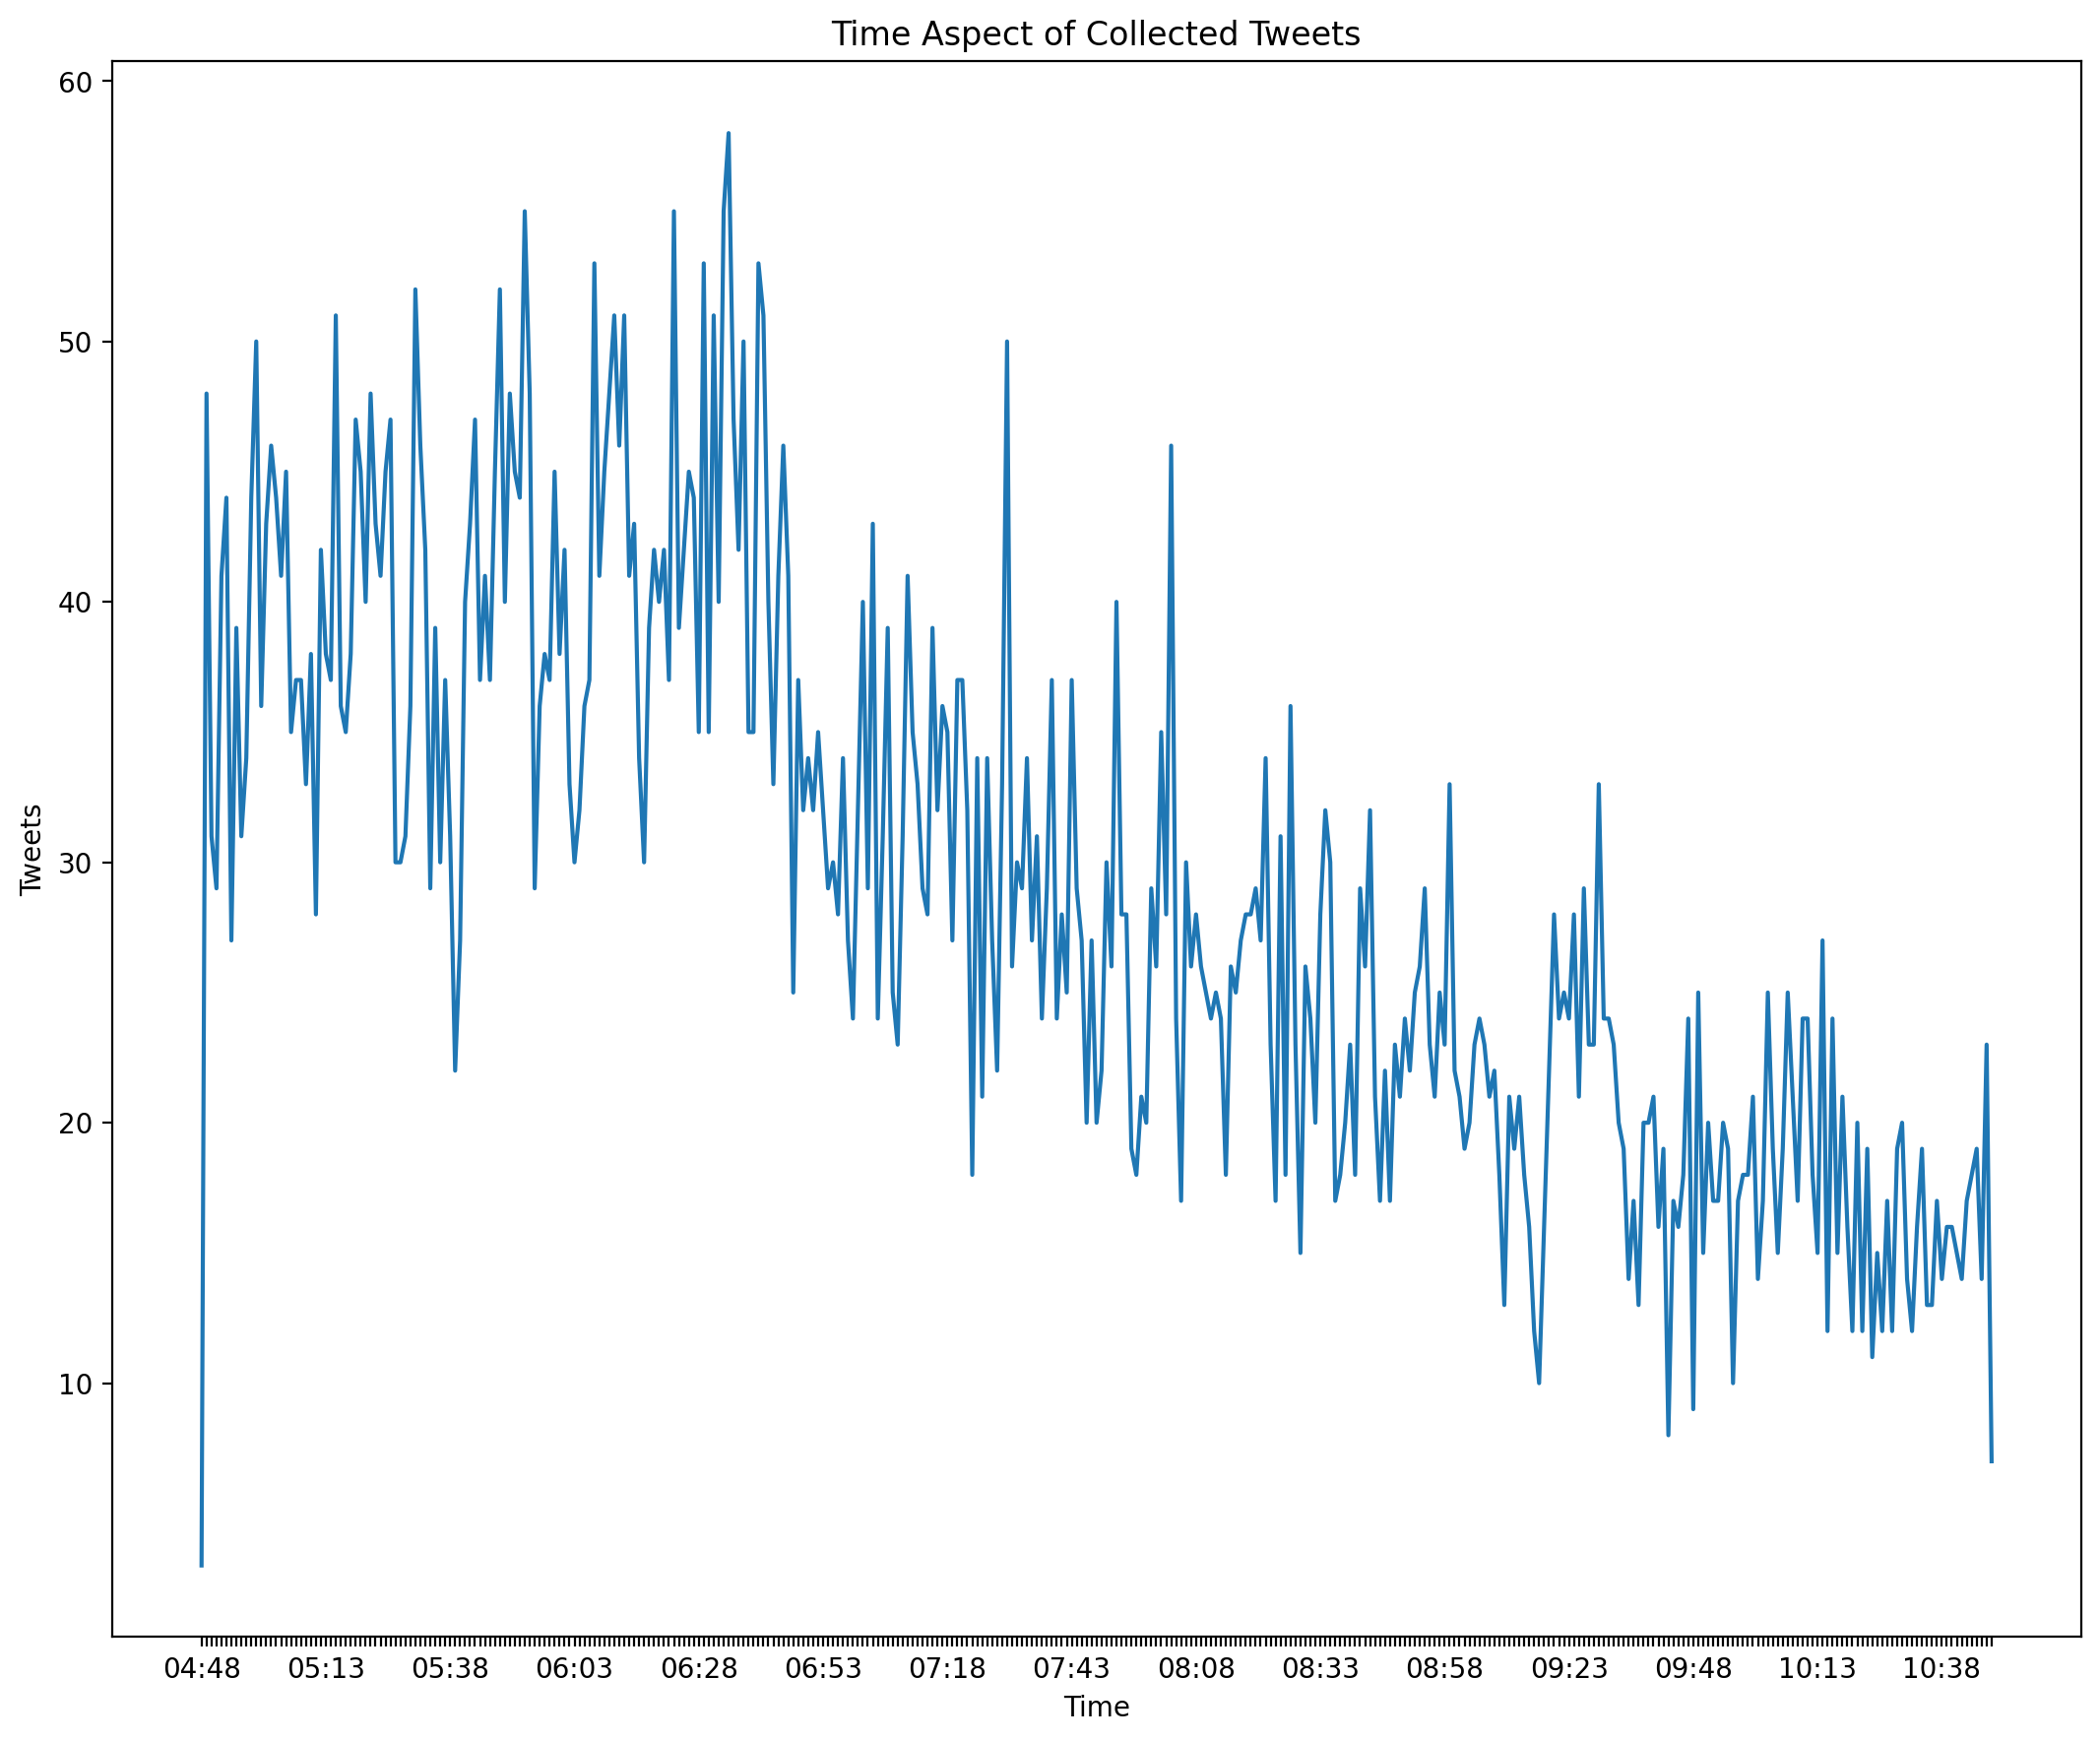

In [70]:
## ANALYZE TIME ASPECT OF TWEETS
x = []
y = []
times = []
for tweet in data["tweets"]:
    created = tweet["created_at"]
    time = created.split(" ")[3]
    times.append(time[0:5])

tt = []
for a_time in set(times):
    tt.append([a_time, times.count(a_time)])
tt.sort()

fig = plt.figure(num=None, figsize=(10, 8), dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
ax.plot([x[0] for x in tt],[x[1] for x in tt])
ax.set_xlabel("Time")
ax.set_ylabel("Tweets")
ax.set_title("Time Aspect of Collected Tweets")
every_nth = 25
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.savefig('barplot-activity.png', bbox_inches = 'tight')
plt.show()

Tweets were collected from 4:48 am to 10:38 on 17th December

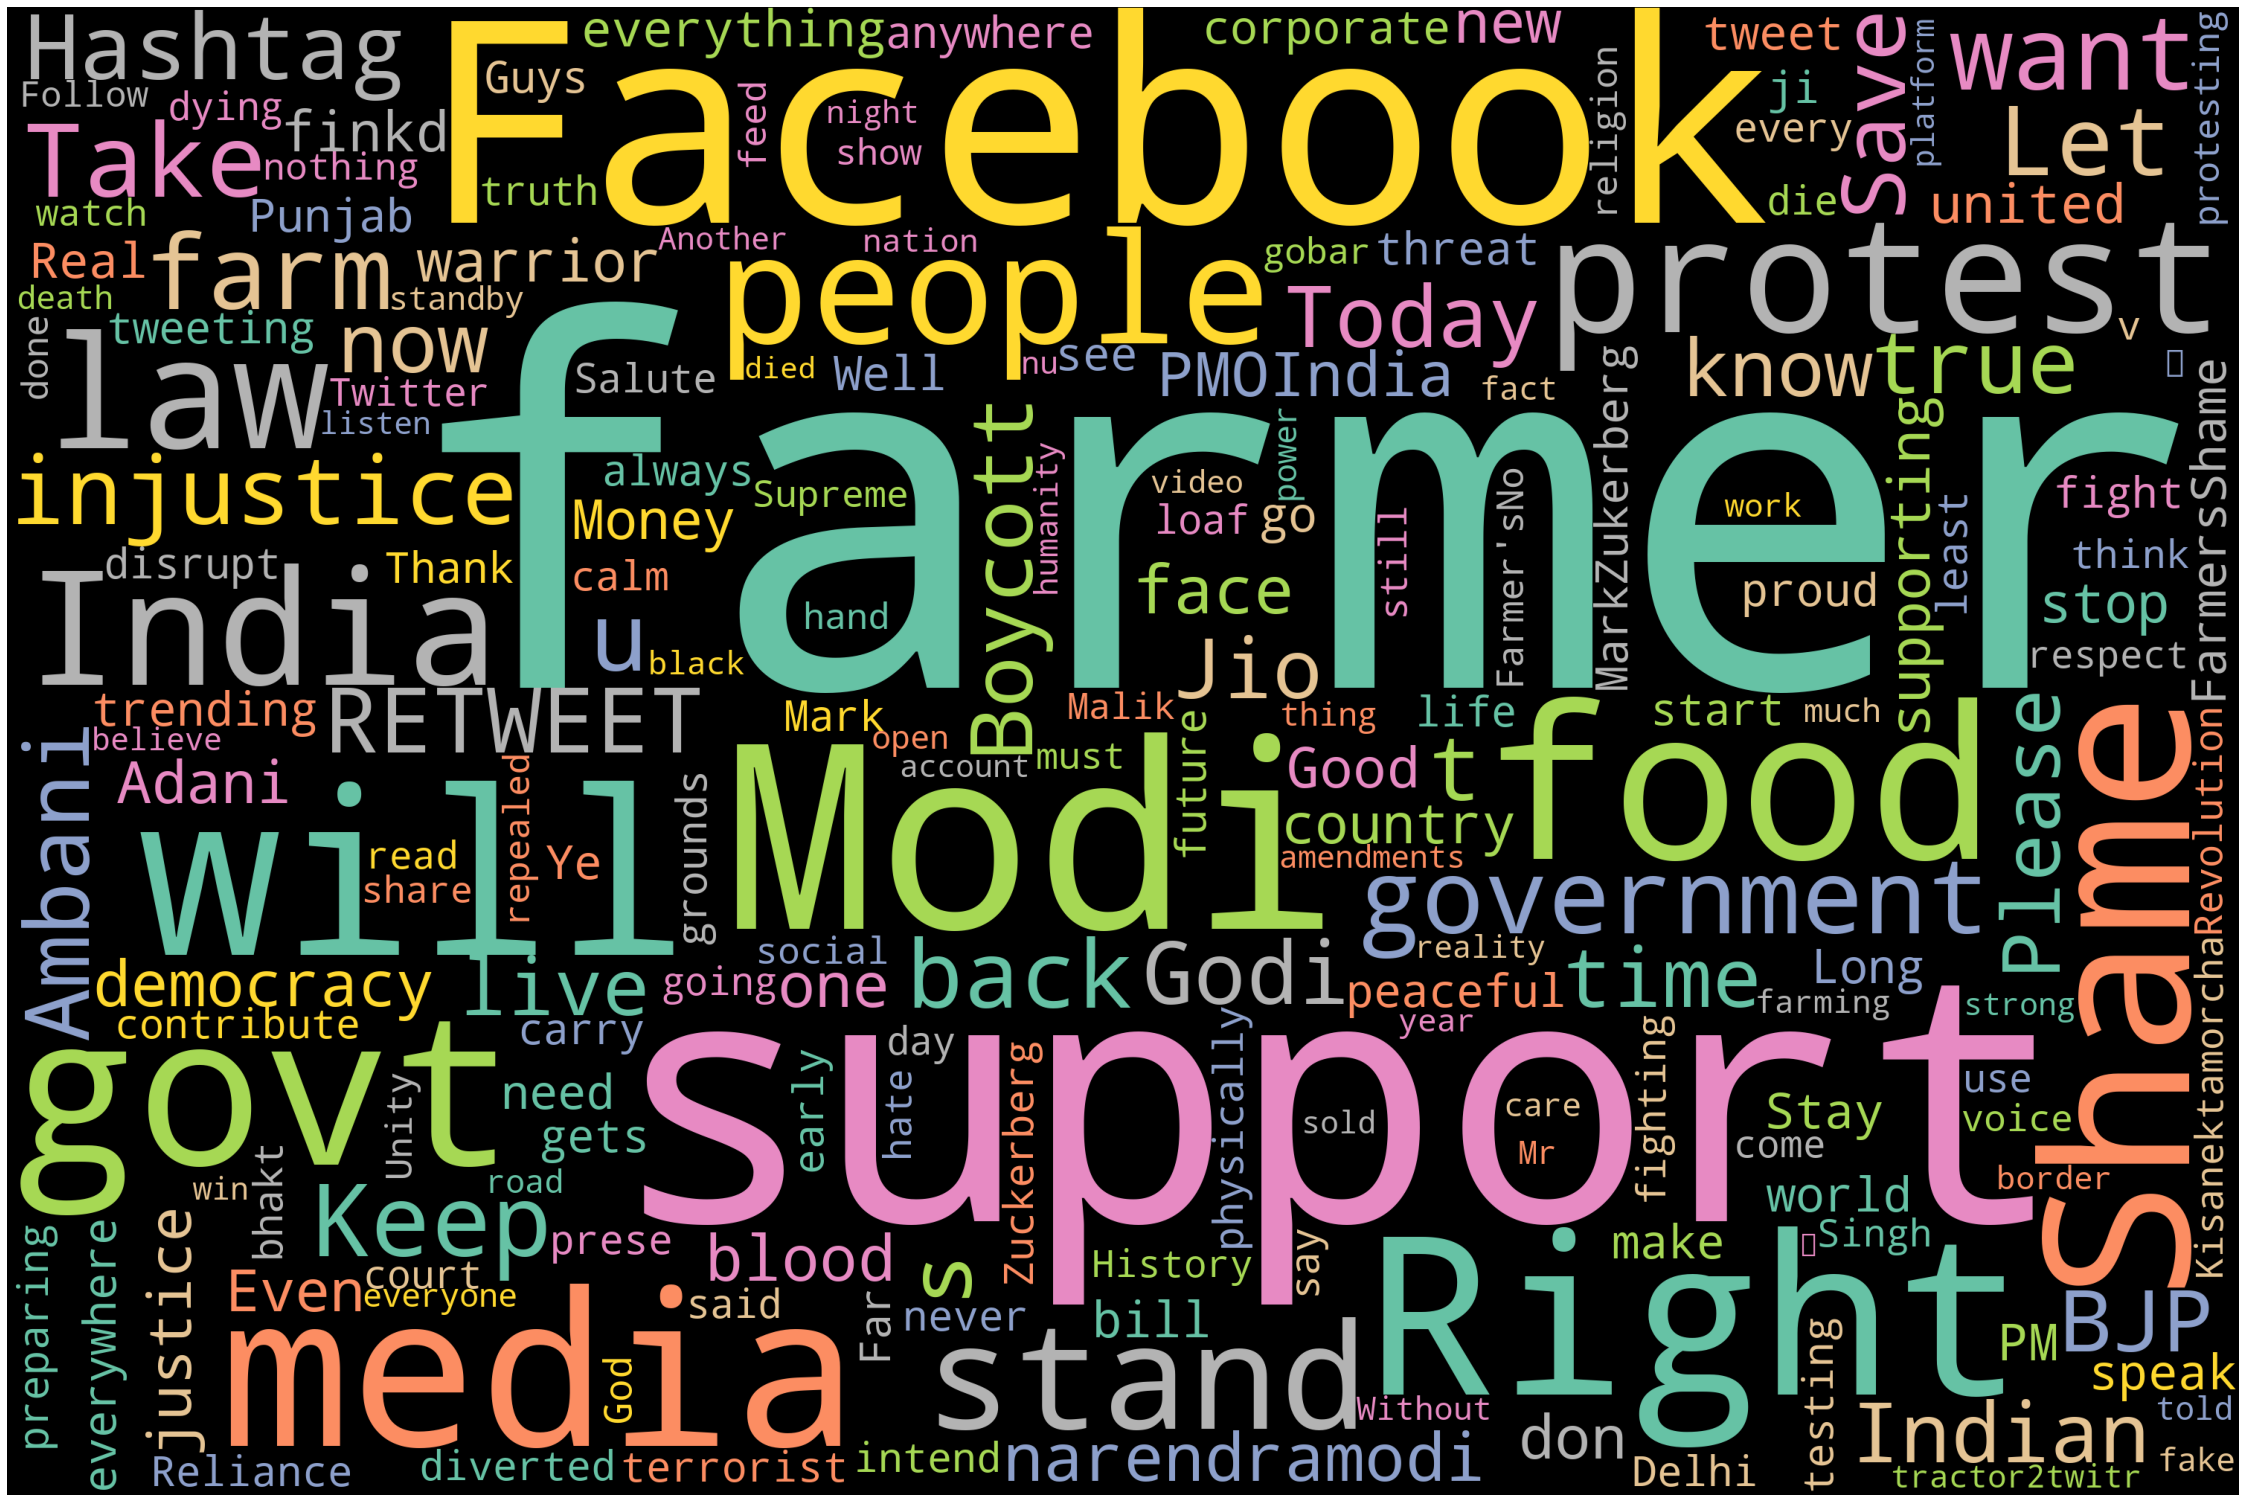

In [71]:
# ENGLISH WORD CLOUD FOR TWEETS
text = ""
for tweet in data["tweets"]:
    if tweet['lang'] == "en":
        text += tweet["text"] + " "
text = clean_text(text)
text = text.replace(hashtag, '')  
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)
wordcloud.to_file(f"wordcloud{hashtag}.png")

###  WHAT CAN WE SAY ABOUT USERS
- Mean followers
- Mean friends
- Word cloud of locations
- Mean Favourites count
- Mean Statuses
- Top how many x % percent of users have made y % of the tweets
- Analyze the past 20 Trends to find trends
- Hashtags in other tweets

In [72]:
# GET ALL UNQIUE USERS FROM COLLECTED DATA 
done_ids = {}
users_uniq = []
for tweet in data["tweets"]:
    user = tweet["user"]
    if user["id"] not in done_ids:
        done_ids[user["id"]] = 1
        users_uniq.append(user)
    else:
        done_ids[user["id"]] += 1
        
for user in users_uniq:
    idx = user['id']
    user['TweetCount'] = done_ids[idx]
print("Unique users are:", len(users_uniq))
# users_uniq[0]

Unique users are: 3290


In [73]:
# BASIC STATS ON DATA
def get_mean(attr):
    count = len(users_uniq)
    attr_data = [u[attr] for u in users_uniq]
    att = np.array(attr_data)
    print(f"Max of {attr}: ",np.max(att))
    print(f"Mean of {attr}: ", np.mean(att))
    print(f"Median of {attr}: ", np.median(att))
    print(f"Std Dev of {attr}: ", np.std(att))
    print("----------------------")
get_mean('followers_count')
get_mean('friends_count')
get_mean('statuses_count')
get_mean('favourites_count')

Max of followers_count:  405955
Mean of followers_count:  656.7398176291794
Median of followers_count:  25.0
Std Dev of followers_count:  9159.4107106156
----------------------
Max of friends_count:  15373
Mean of friends_count:  283.8659574468085
Median of friends_count:  72.0
Std Dev of friends_count:  859.4568108358723
----------------------
Max of statuses_count:  282727
Mean of statuses_count:  2753.337689969605
Median of statuses_count:  200.5
Std Dev of statuses_count:  12473.69297768175
----------------------
Max of favourites_count:  356757
Mean of favourites_count:  3472.4714285714285
Median of favourites_count:  293.5
Std Dev of favourites_count:  13975.51084110532
----------------------


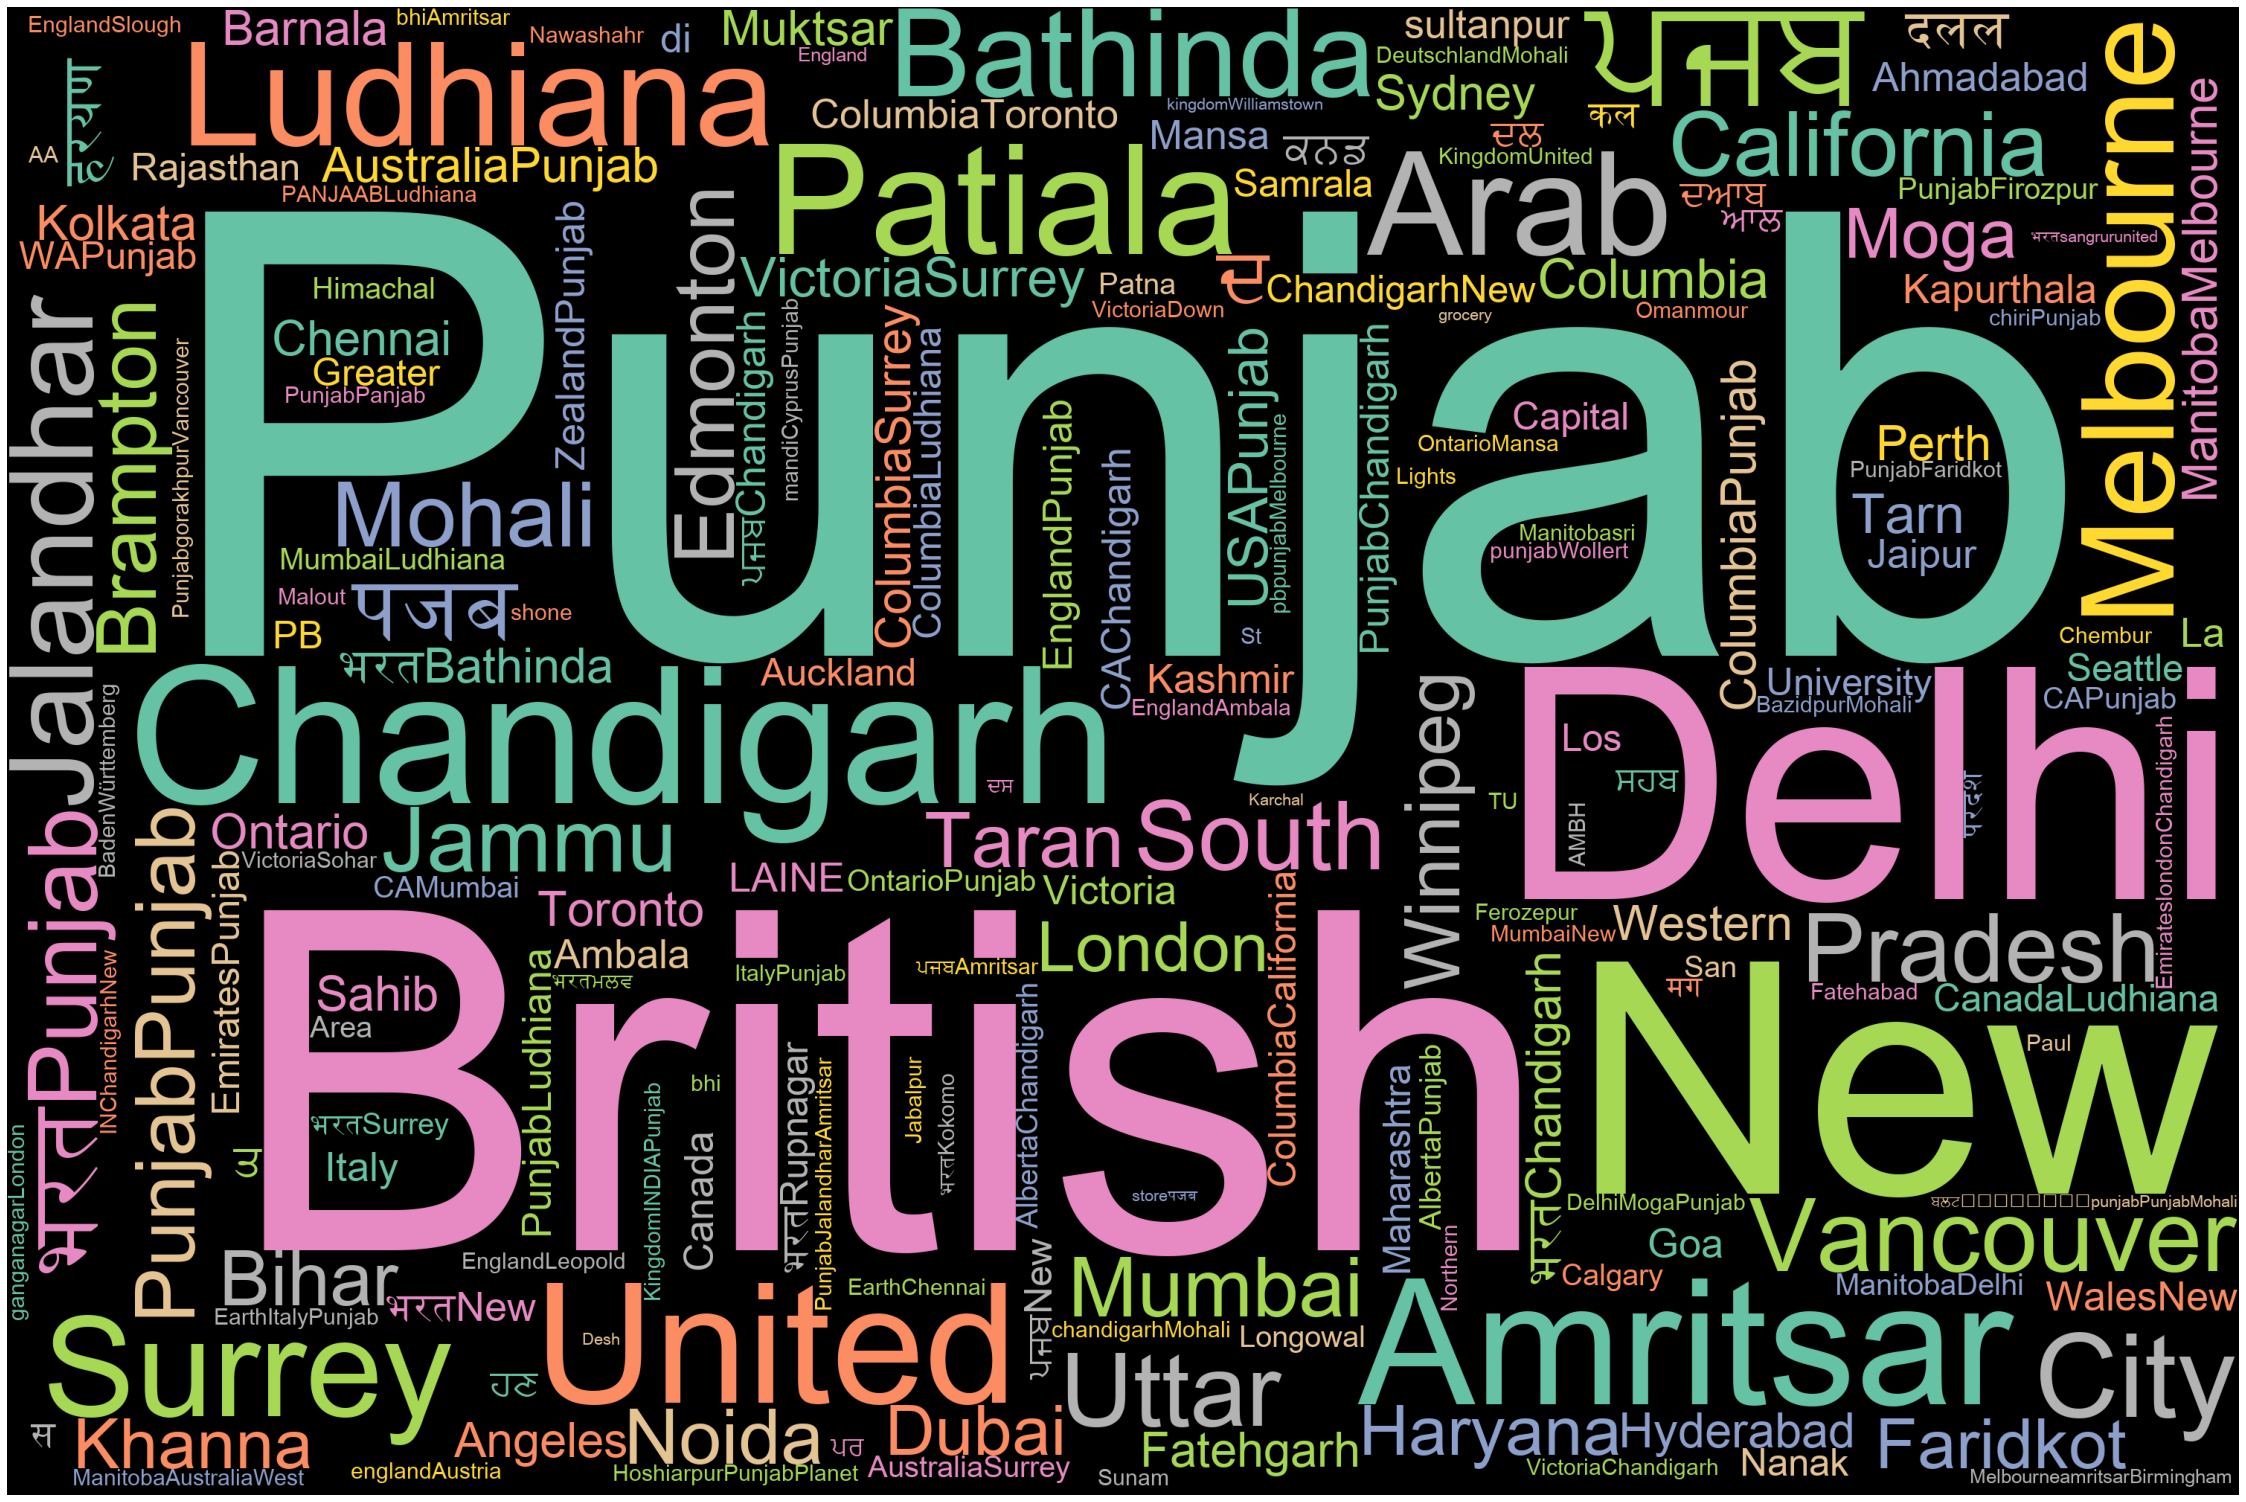

In [74]:
location_text = ""
for user in users_uniq:
    if user["location"] != '':
        location_text += user['location']
location_text = clean_text(location_text)
location_text = location_text.replace('india', '')
location_text = location_text.replace("India", '')
location_text = ''.join([i for i in location_text if (i.isalpha() or i == ' ')])
wordcloud = WordCloud(font_path='arial-unicode-ms.ttf',
                      width = 3000, height = 2000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False, stopwords = STOPWORDS).generate(location_text)

plot_cloud(wordcloud)
wordcloud.to_file(f"wordcloud-locations{hashtag}.png")

Mostly North Indian Cities and states, with some cities from abroad like Melbourne and Vancouver

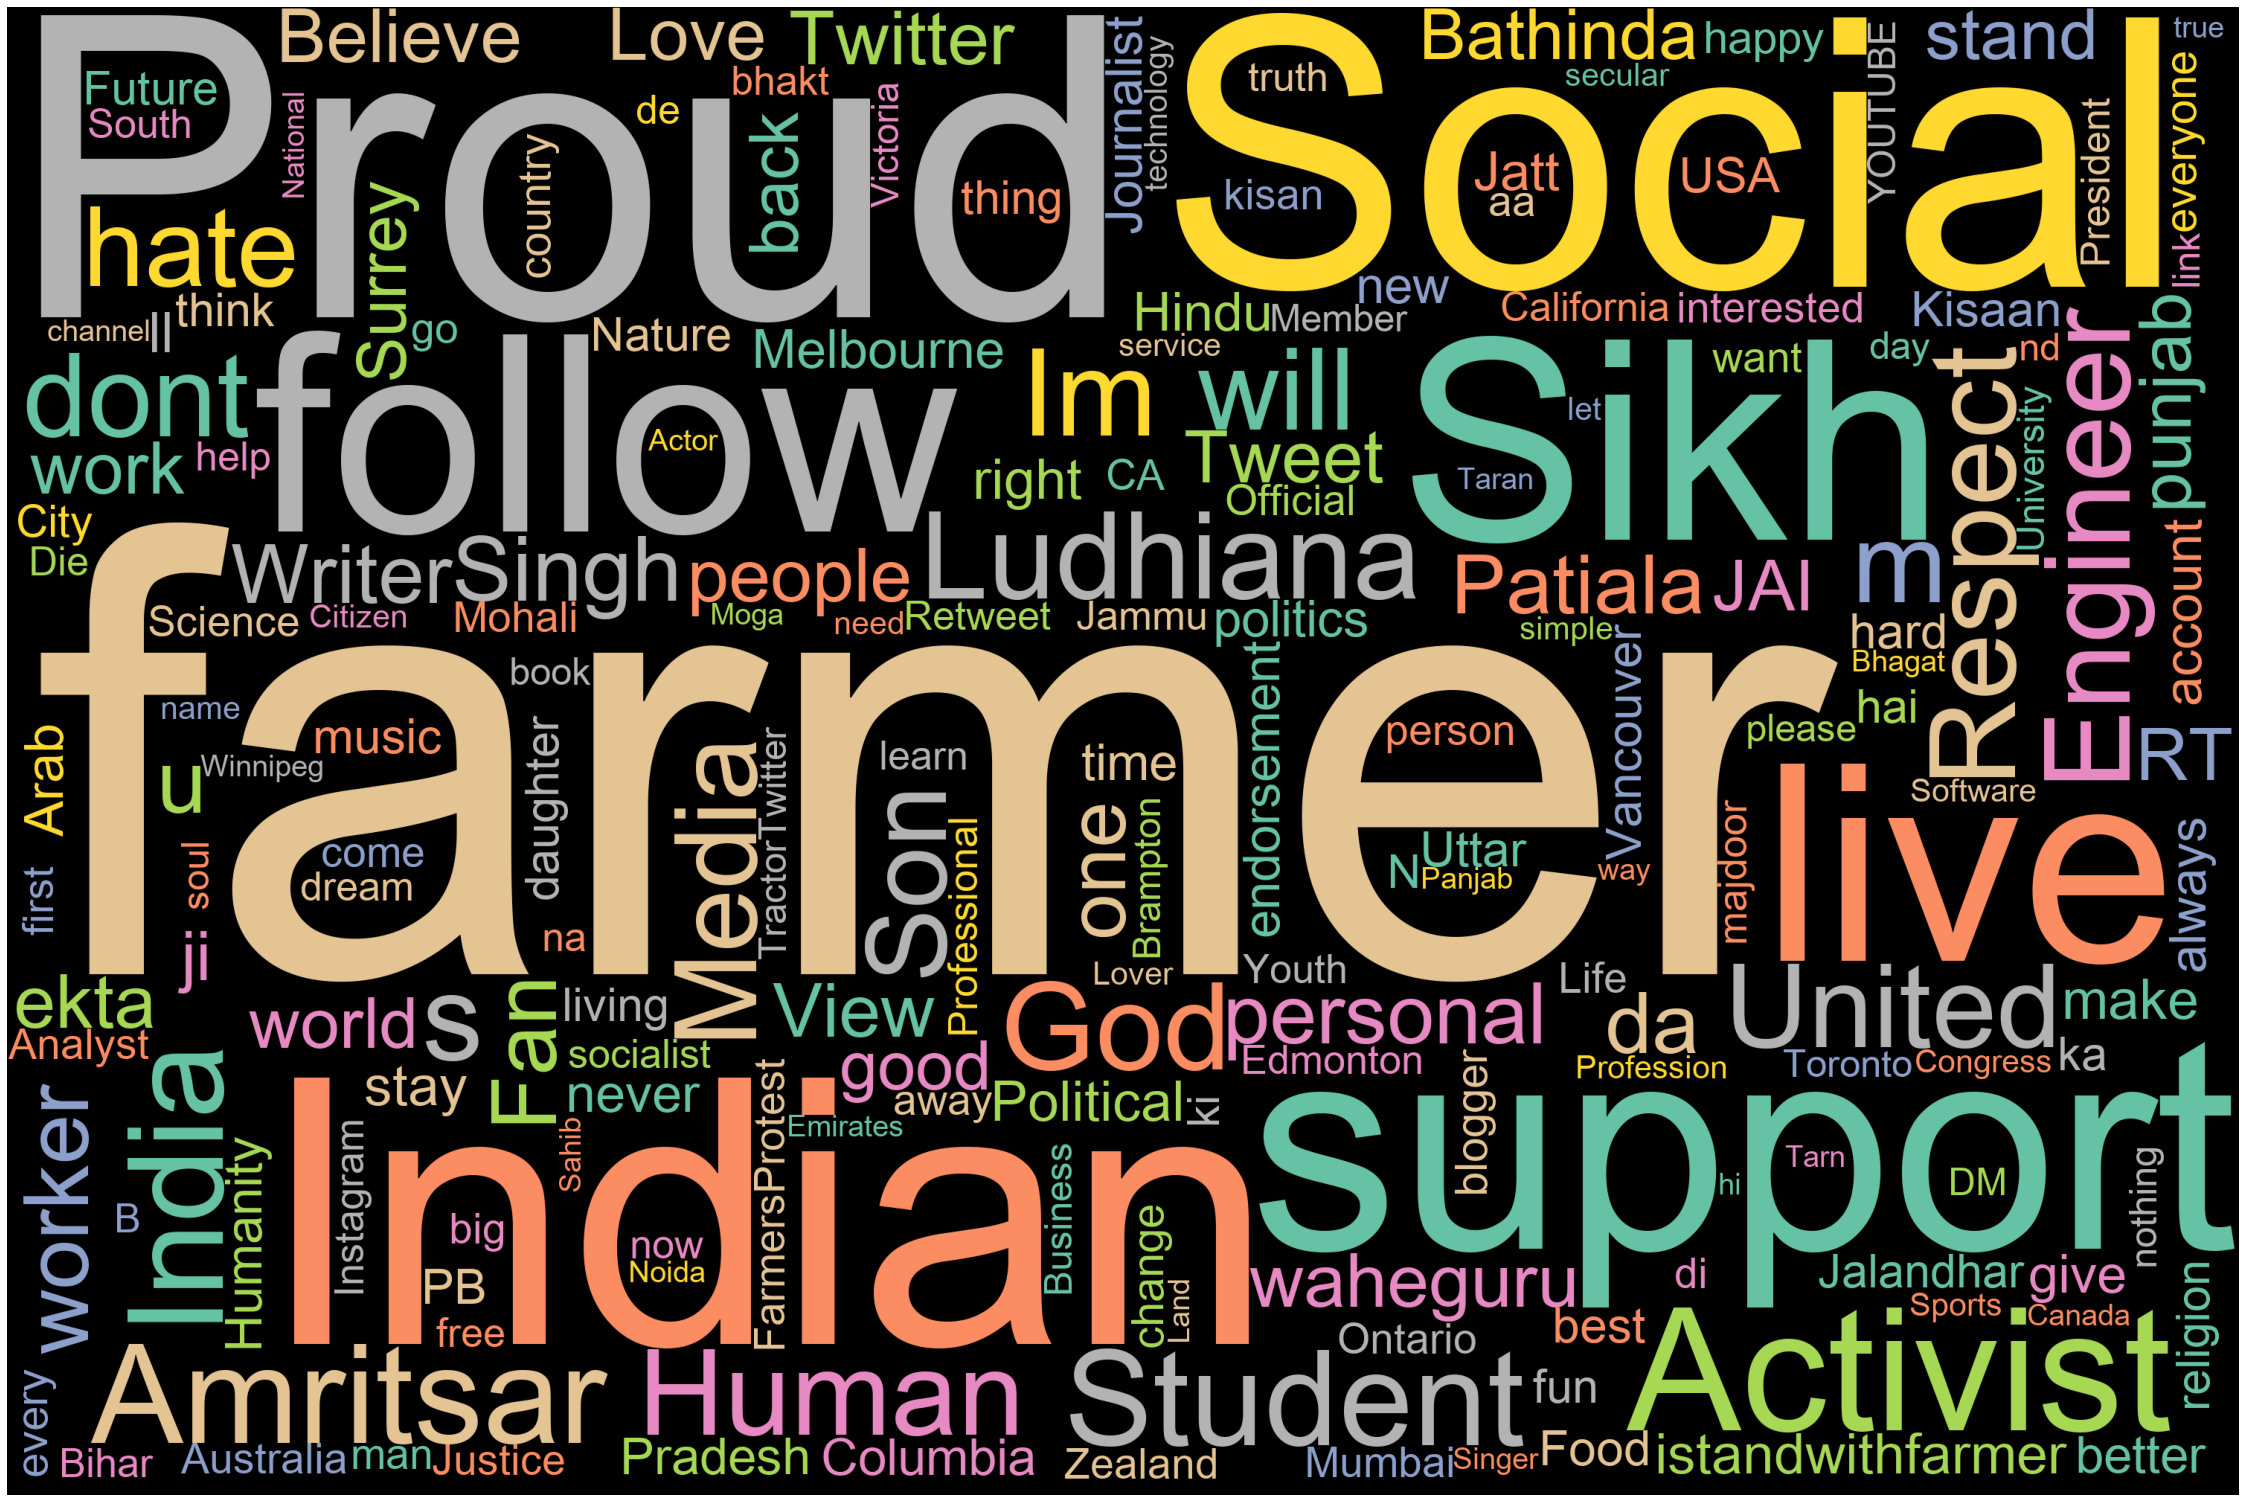

In [75]:
text = ""
for user in users_uniq:
    if user["description"] != '':
        location_text += user['description']
text = clean_text(text)
text = ''.join([i for i in location_text if ((i.isalpha() and ord(i) < 127) or i == ' ')])
filtr = ["Punjab", "British", "Delhi", "love", "lover", "New", "life", "Chandigarh"]
for w in filtr:
    text = text.replace(w, '')
wordcloud = WordCloud(font_path='arial-unicode-ms.ttf',
                      width = 3000, height = 2000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)
wordcloud.to_file(f"wordcloud-desc{hashtag}.png")
del text 

Farmer stands out, along with Activist, Students and Social Workers

In [76]:
# GET RECENT 20 TWEETS FROM THE USER
def tweets_from_user(name, idx):
    try:
        cursor = api.user_timeline(screen_name=name,
                               count = 20, 
                               include_rts=False,
                               tweet_mode='extended')
        usr_tweets = {}
        usr_tweets["tweets"] = []
        for tweet in cursor:
            usr_tweets["tweets"].append(tweet._json)
        time = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
        file_name = f'usertweets/data-{idx}-{time}.json'
        with open(file_name, 'w') as file:
            json.dump(usr_tweets, file)
        print(f"Wrote 20 tweets of {name}")
    except:
        print(f"Some error for {name}, {idx}")
i = 0
for user in users_uniq:
    i += 1
    # tweets_from_user(user["screen_name"], i)
## LOAD OTHER TWEETS FROM FILES
onlyfiles = [f for f in listdir("usertweets/") if isfile(join("usertweets/", f))]
usertweets = []
for file in onlyfiles:
    with open("usertweets/" + file, "r") as f:
        usertweets.extend(json.load(f)["tweets"])
print("Loaded tweets :", len(usertweets))

Loaded tweets : 47932


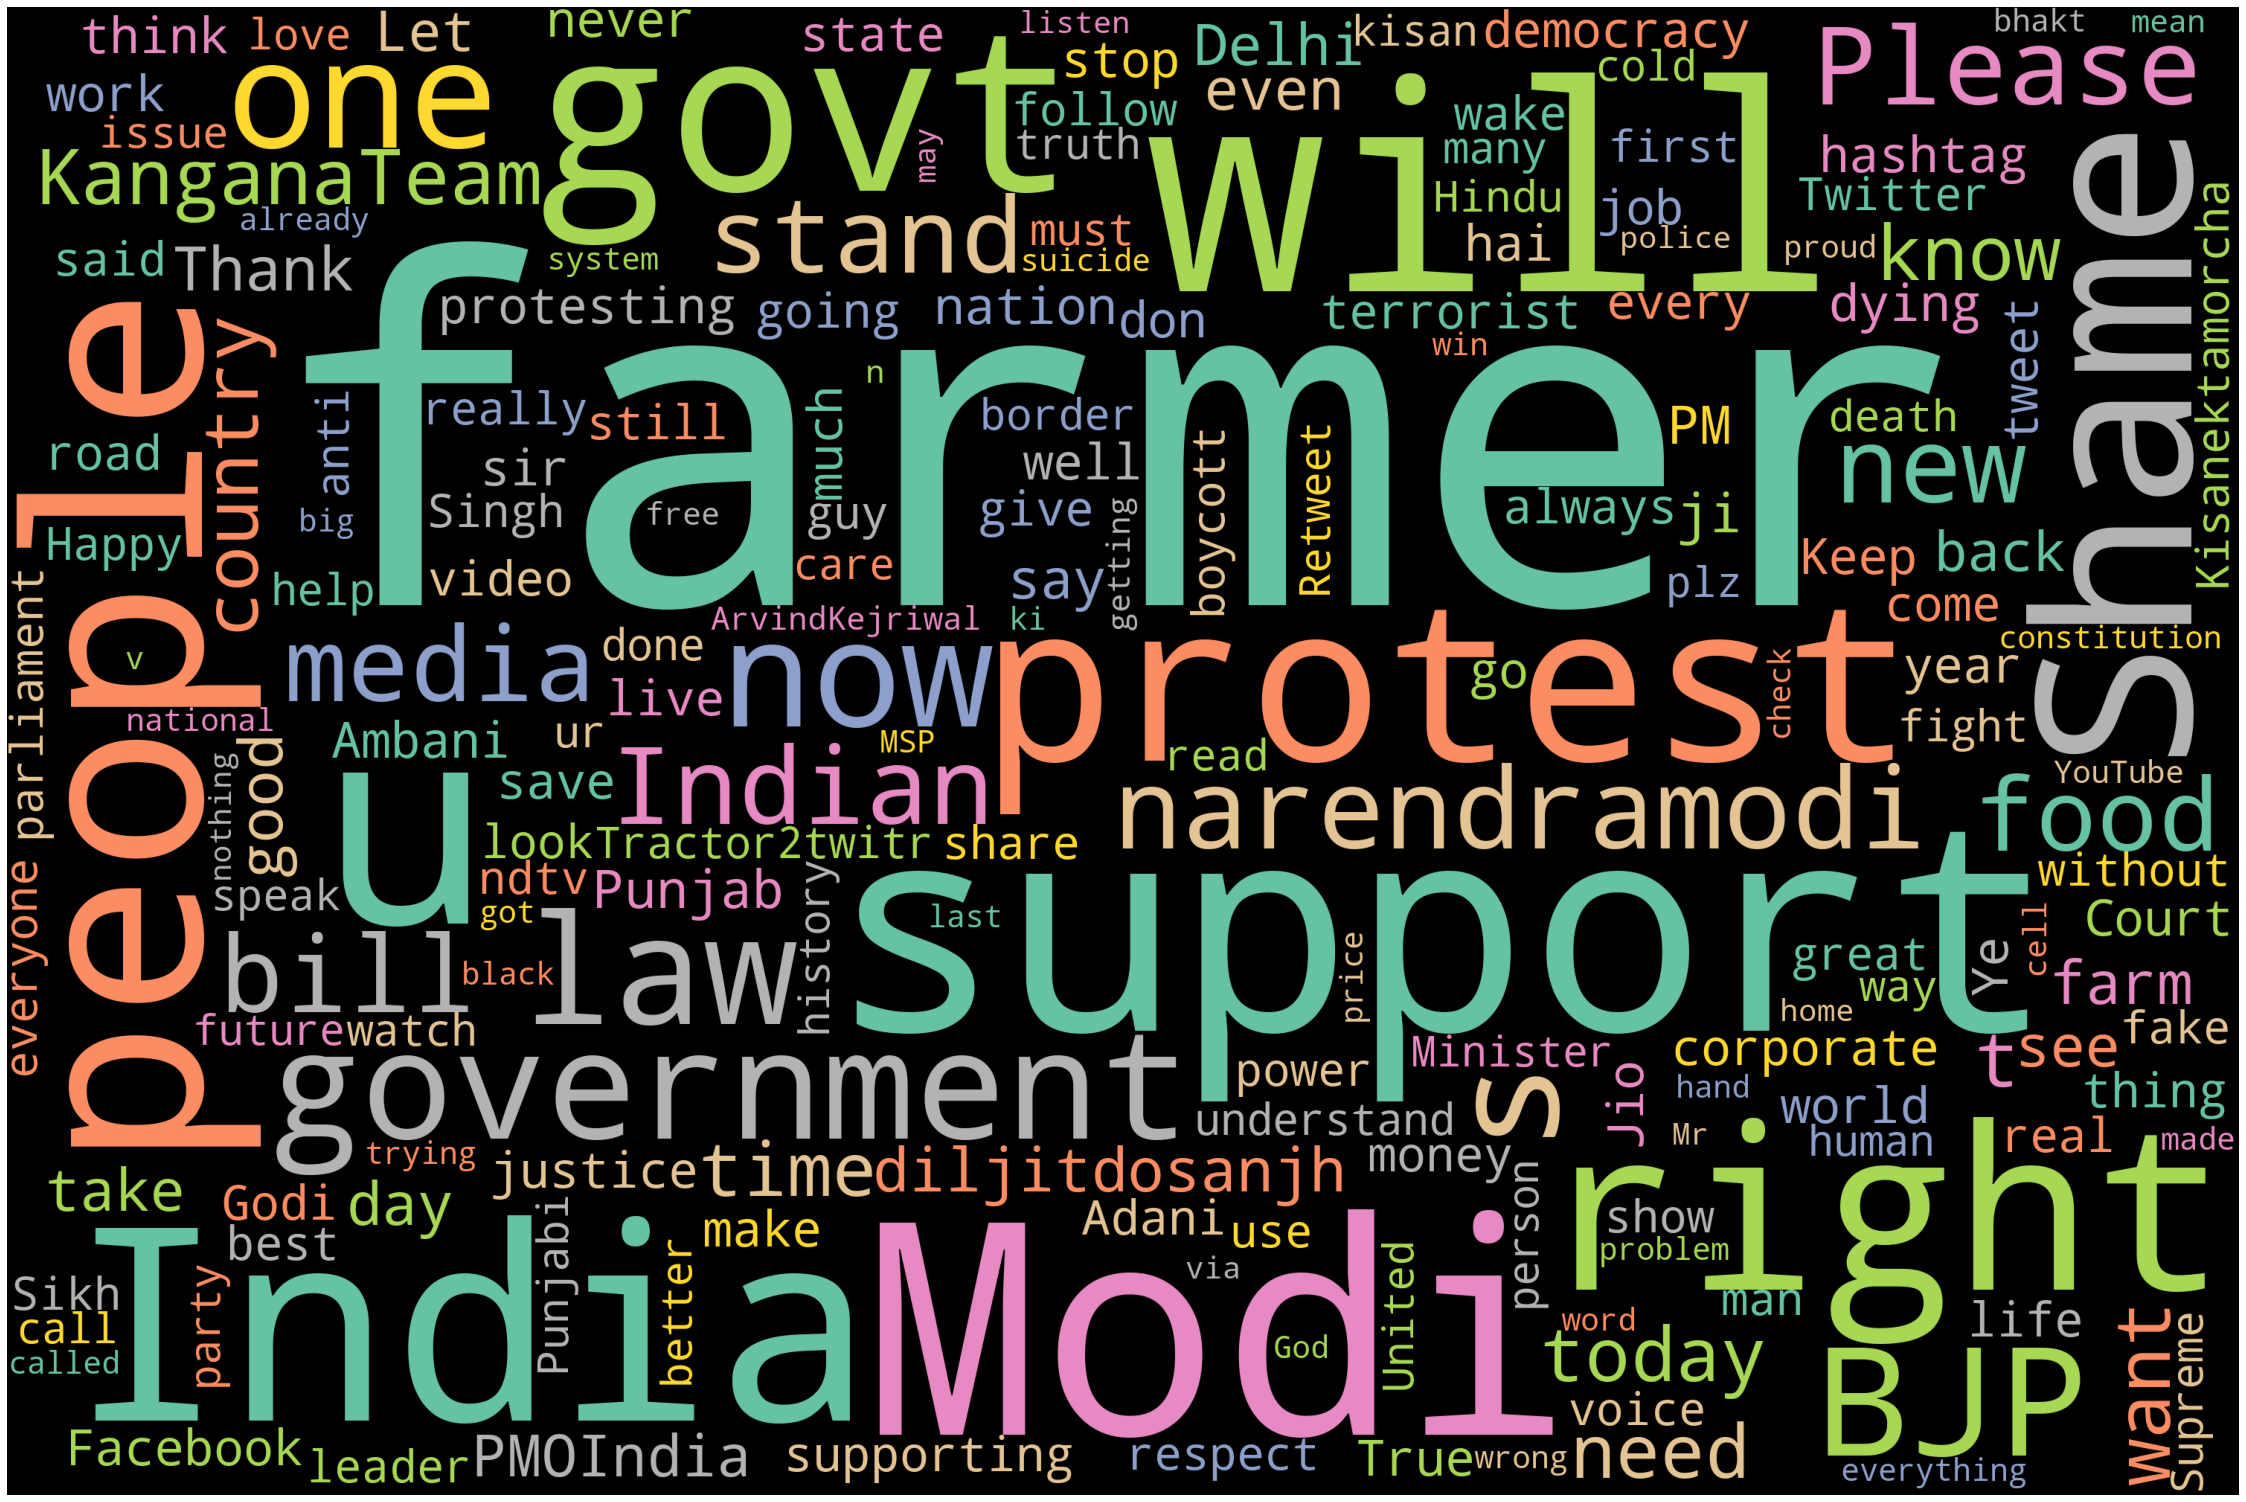

In [77]:
text = ""
for tweet in usertweets:
    if tweet['lang'] == "en":
        text += tweet["full_text"] + " "
text = clean_text(text)
text = re.sub(r'#\S+', '', text)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False, stopwords = STOPWORDS).generate(text)

plot_cloud(wordcloud)
wordcloud.to_file(f"wordcloud-users.png")

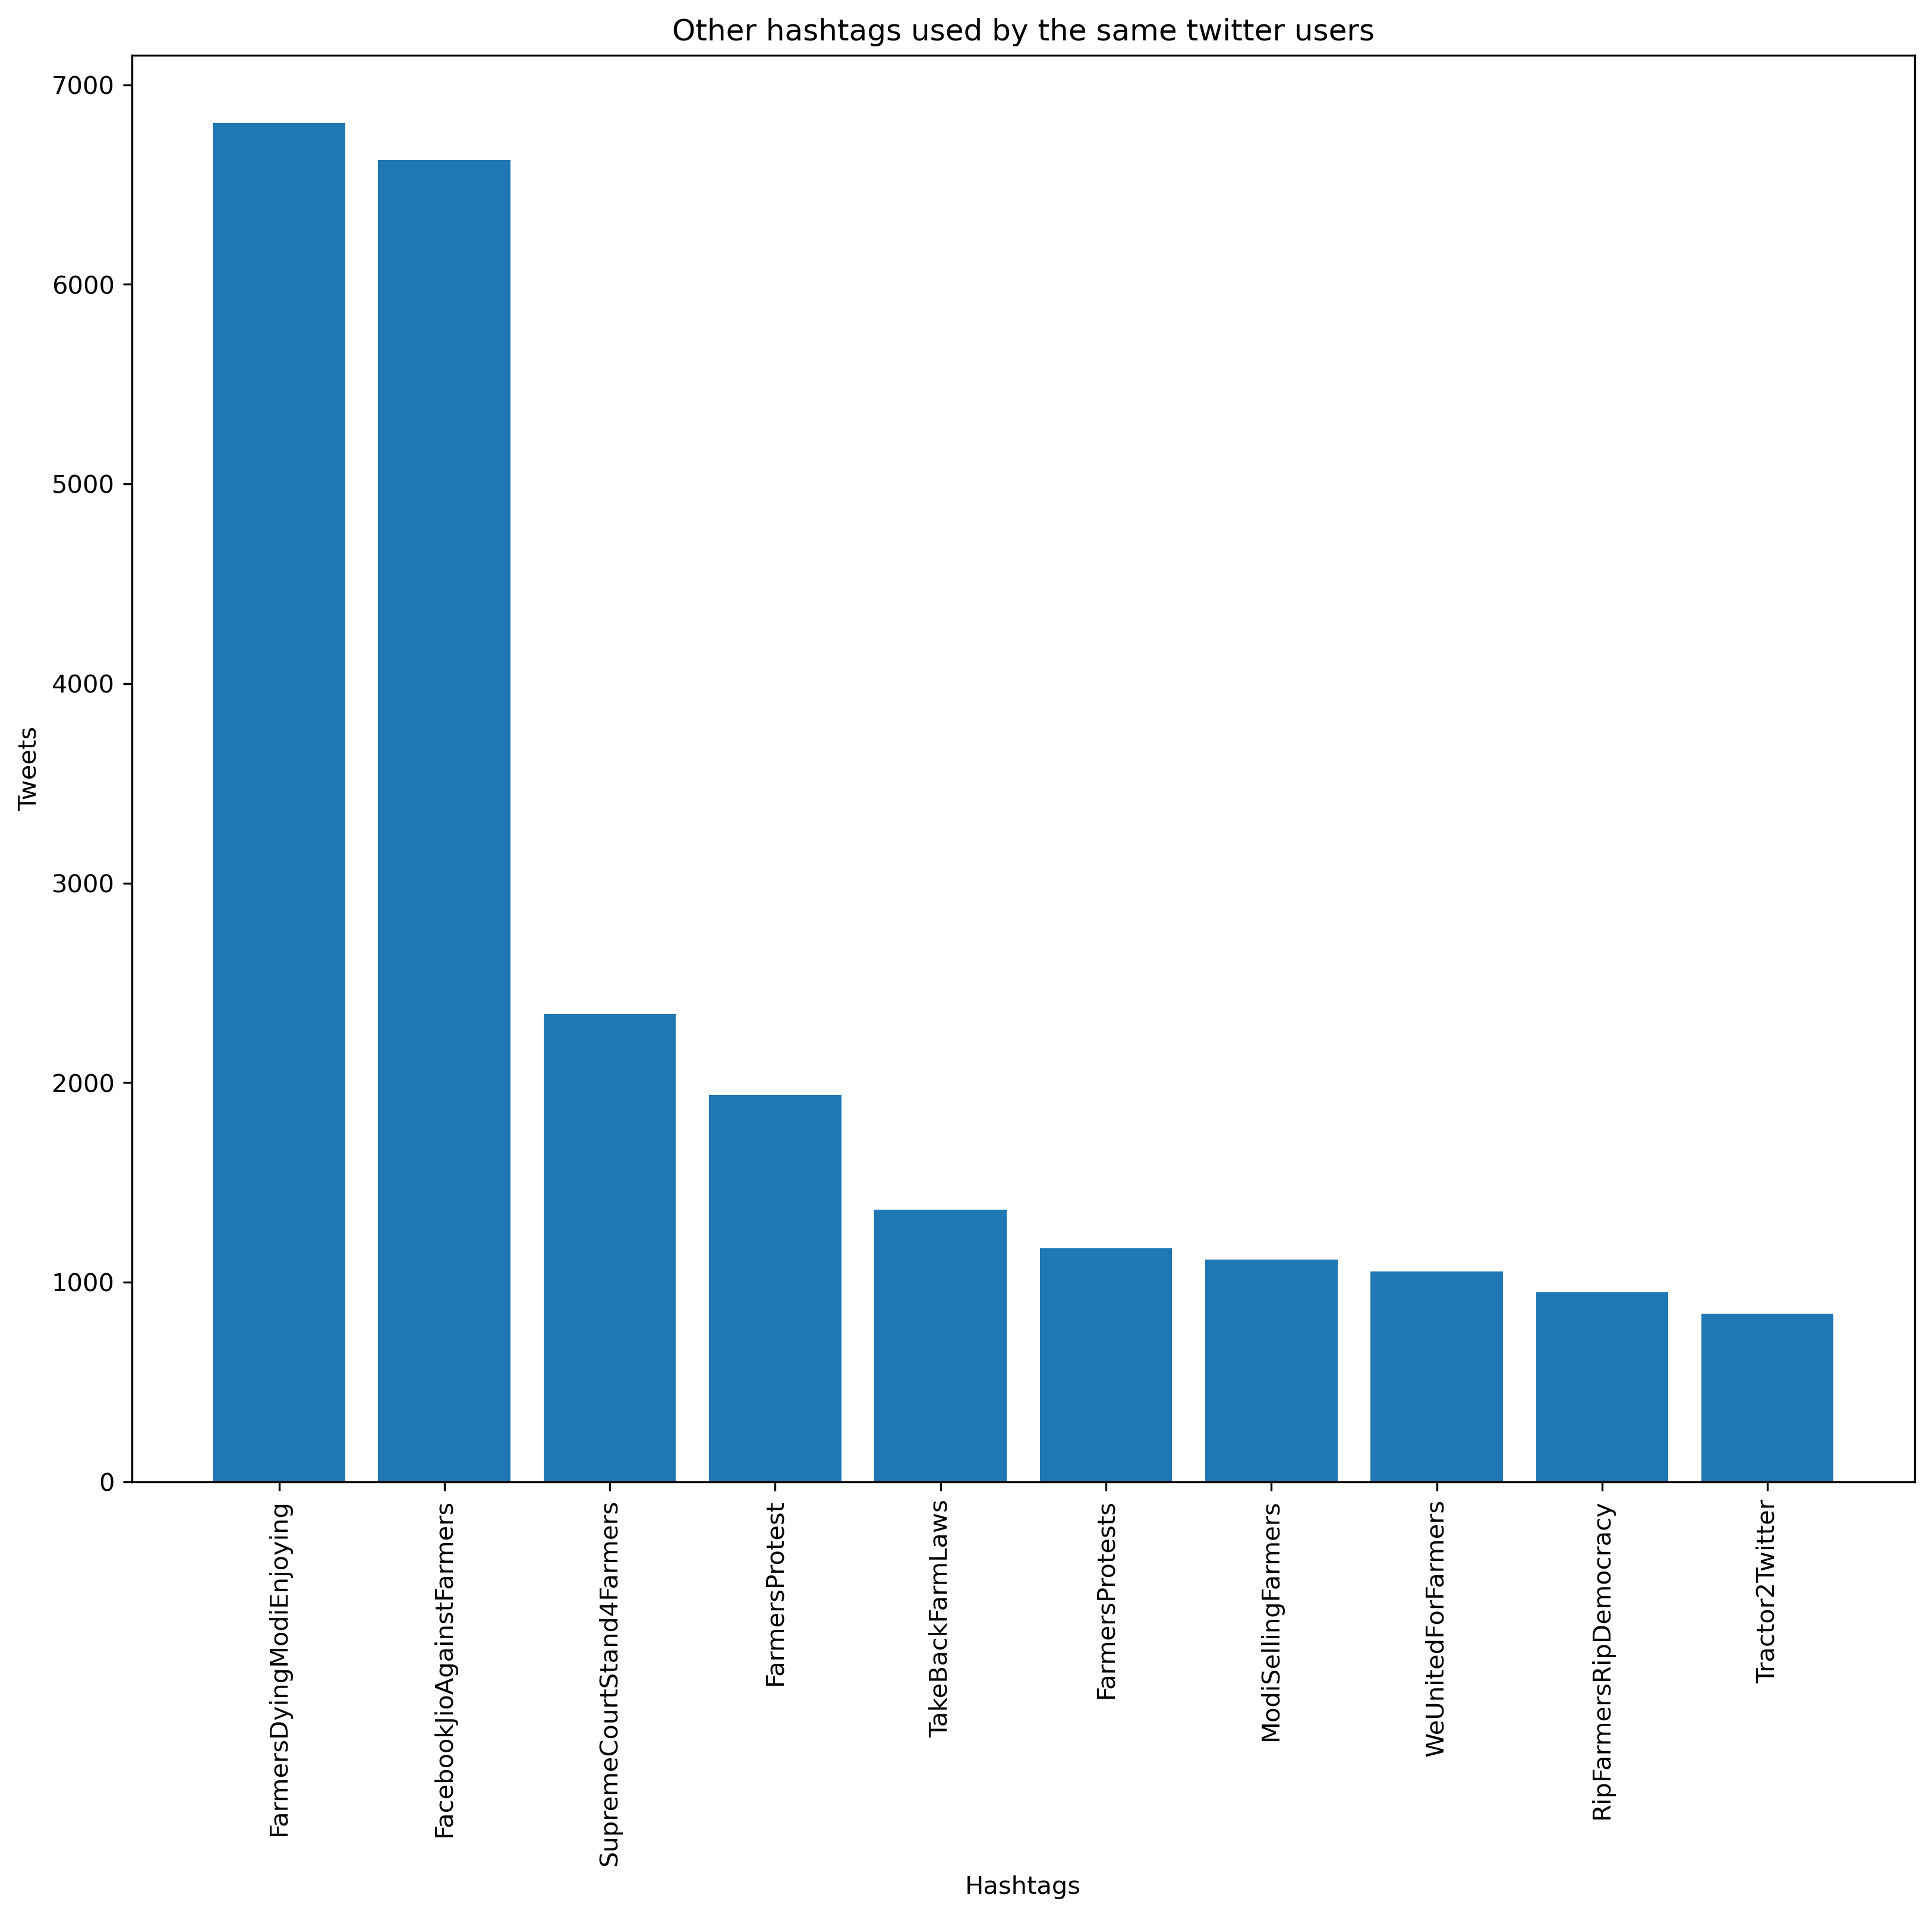

In [78]:
## TAGS USED BY USERS IN OTHER TWEETS
other_tag = {}
for tweet in usertweets:
    fulltext = tweet["full_text"]
    tags = [word[word.rfind('#'):] for word in fulltext.split() if word[0] == '#' and word.rfind('#') != len(word) - 1]
    for tag in tags:
        if tag not in other_tag:
            other_tag[tag] = 1
        else:
            other_tag[tag] += 1
other_tag_d = sorted([[key, other_tag[key]] for key in other_tag], key=lambda x: -x[1])[0:10]
x = [t[0][1:] for t in other_tag_d]
y = [t[1] for t in other_tag_d]
fig = plt.figure(num=None, figsize=(10, 8), dpi=300, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
ax.set_xlabel("Hashtags", )
ax.set_ylabel("Tweets")
plt.xticks(rotation=90)
ax.set_title("Other hashtags used by the same twitter users")
plt.savefig('barplot.png', bbox_inches = 'tight')
plt.show()

In the last 20 tweets #FarmersDyingModiEnjoying shows the discontent of farmers with the current government.

### Language Aspect Analysis
- Get most common scripts used in code
- Get most common emojis
- Get average tweet length

In [79]:
### GET MOST COMMON SCRIPTS
data = json.load(open(data_file))
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
text = ""
for tweet in data["tweets"]:
        text += tweet["text"] + " "
text = clean_text(text)
text = re.sub(r'@\S+', '', text)
text = text.replace(hashtag, '')
text = deEmojify(text)
scriptz = {}
for s in text:
    script, _ = script_cat(s)
    if script == 'Common':
        continue
    try:
        scriptz[script] += 1
    except KeyError:
        scriptz[script] = 1
# Plot Languages as a Pie Chart
data = pd.Series(scriptz).reset_index(name='value').rename(columns={'index':'scriptz'})
print(data)
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(scriptz)]

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
        tools="hover", tooltips="@scriptz: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data, legend_field="scriptz")
output_notebook()
show(p)

      scriptz   value
0       Latin  175331
1    Gurmukhi  124999
2  Devanagari   33364
3     Unknown     155
4   Inherited      78
5      Telugu      53
6    Gujarati      36
7       Tamil      79
8     Kannada       2


Loading BokehJS ...

In [80]:
### Analyze scripts in the past 20 tweets of the user
text = ""
for tweet in usertweets:
        text += tweet["full_text"] + " "
text = clean_text(text)
text = re.sub(r'@\S+', '', text)
text = text.replace(hashtag, '')
text = deEmojify(text)
scriptz = {}
for s in text:
    script, _ = script_cat(s)
    if script == 'Common':
        continue
    try:
        scriptz[script] += 1
    except KeyError:
        scriptz[script] = 1
data = pd.Series(scriptz).reset_index(name='value').rename(columns={'index':'scriptz'})
print(data)
data['angle'] = data['value']/data['value'].sum() * 2*pi
data['color'] = Category20c[len(scriptz)]

p = figure(plot_height=350, title="Pie Chart", toolbar_location=None,
        tools="hover", tooltips="@scriptz: @value")

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', source=data, legend_field="scriptz")
output_notebook()
show(p)

       scriptz    value
0        Latin  1056798
1   Devanagari   247019
2    Inherited      894
3      Unknown     2879
4        Tamil     5197
5     Gurmukhi   386136
6       Arabic      422
7      Tibetan        4
8      Braille        1
9      Bengali      786
10      Telugu     1097
11   Malayalam      156
12     Kannada      182
13    Gujarati     1131
14       Greek        1
15      Tai_Le       12
16    Balinese       12
17    Cyrillic        4


Loading BokehJS ...

In [81]:
### Analyze Emojis in tweets
data = json.load(open(data_file))
import emoji
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.UNICODE_EMOJI)
text = ""
for tweet in data["tweets"]:
        text += tweet["text"] + " "
        
text = extract_emojis(text)
# print(text)
emoji_fre = {}

for t in text:
    try:
        emoji_fre[t] += 1
    except KeyError:
        emoji_fre[t] = 1
        
# print(emoji_fre)
# most used emoji

lii  = [(k,v) for k, v in emoji_fre.items()]
lii.sort(key = lambda x : -x[1])
print(lii[0:3])


[('🙏', 349), ('🌾', 267), ('😂', 251)]


In [82]:
## AVG TWEET LEN
data = json.load(open(data_file))
total = 0
for t in data["tweets"]:
    total += len(t["text"])
print("Average Characters in a tweet: ", total/len(data["tweets"]))

Average Characters in a tweet:  90.74019047619048


### What can be said about friends and followers

In [83]:
friend_com = {}
lll = []
onlyfiles = [f for f in listdir("userfriends2/") if isfile(join("userfriends2/", f))]
for file in onlyfiles:
    with open("userfriends2/" + file, "r") as f:
        userss = json.load(f)
        for uss in userss["users"]:
            lll.append(uss)
            try:
                friend_com[uss["id"]] += 1
            except:
                friend_com[uss["id"]] = 1
dxx = [[k, v] for k, v in friend_com.items()]
dxx.sort(key = lambda x : -x[1])
for k in dxx[0:5]:
    print(k)
    for u in lll:
        if u["id"] == k[0]:
            print(u["screen_name"])
            break

[1338536920066879488, 179]
Kisanektamorcha
[310679156, 98]
diljitdosanjh
[1332938946620268546, 58]
Tractor2twitr
[2494091010, 50]
BawaRanjit
[459474360, 49]
AmmyVirk


### Most Common Friend
@Kisanektamorcha is the most common friend, which whose page was suspiciously taken down by facebook on 21st December and  then brought up. 

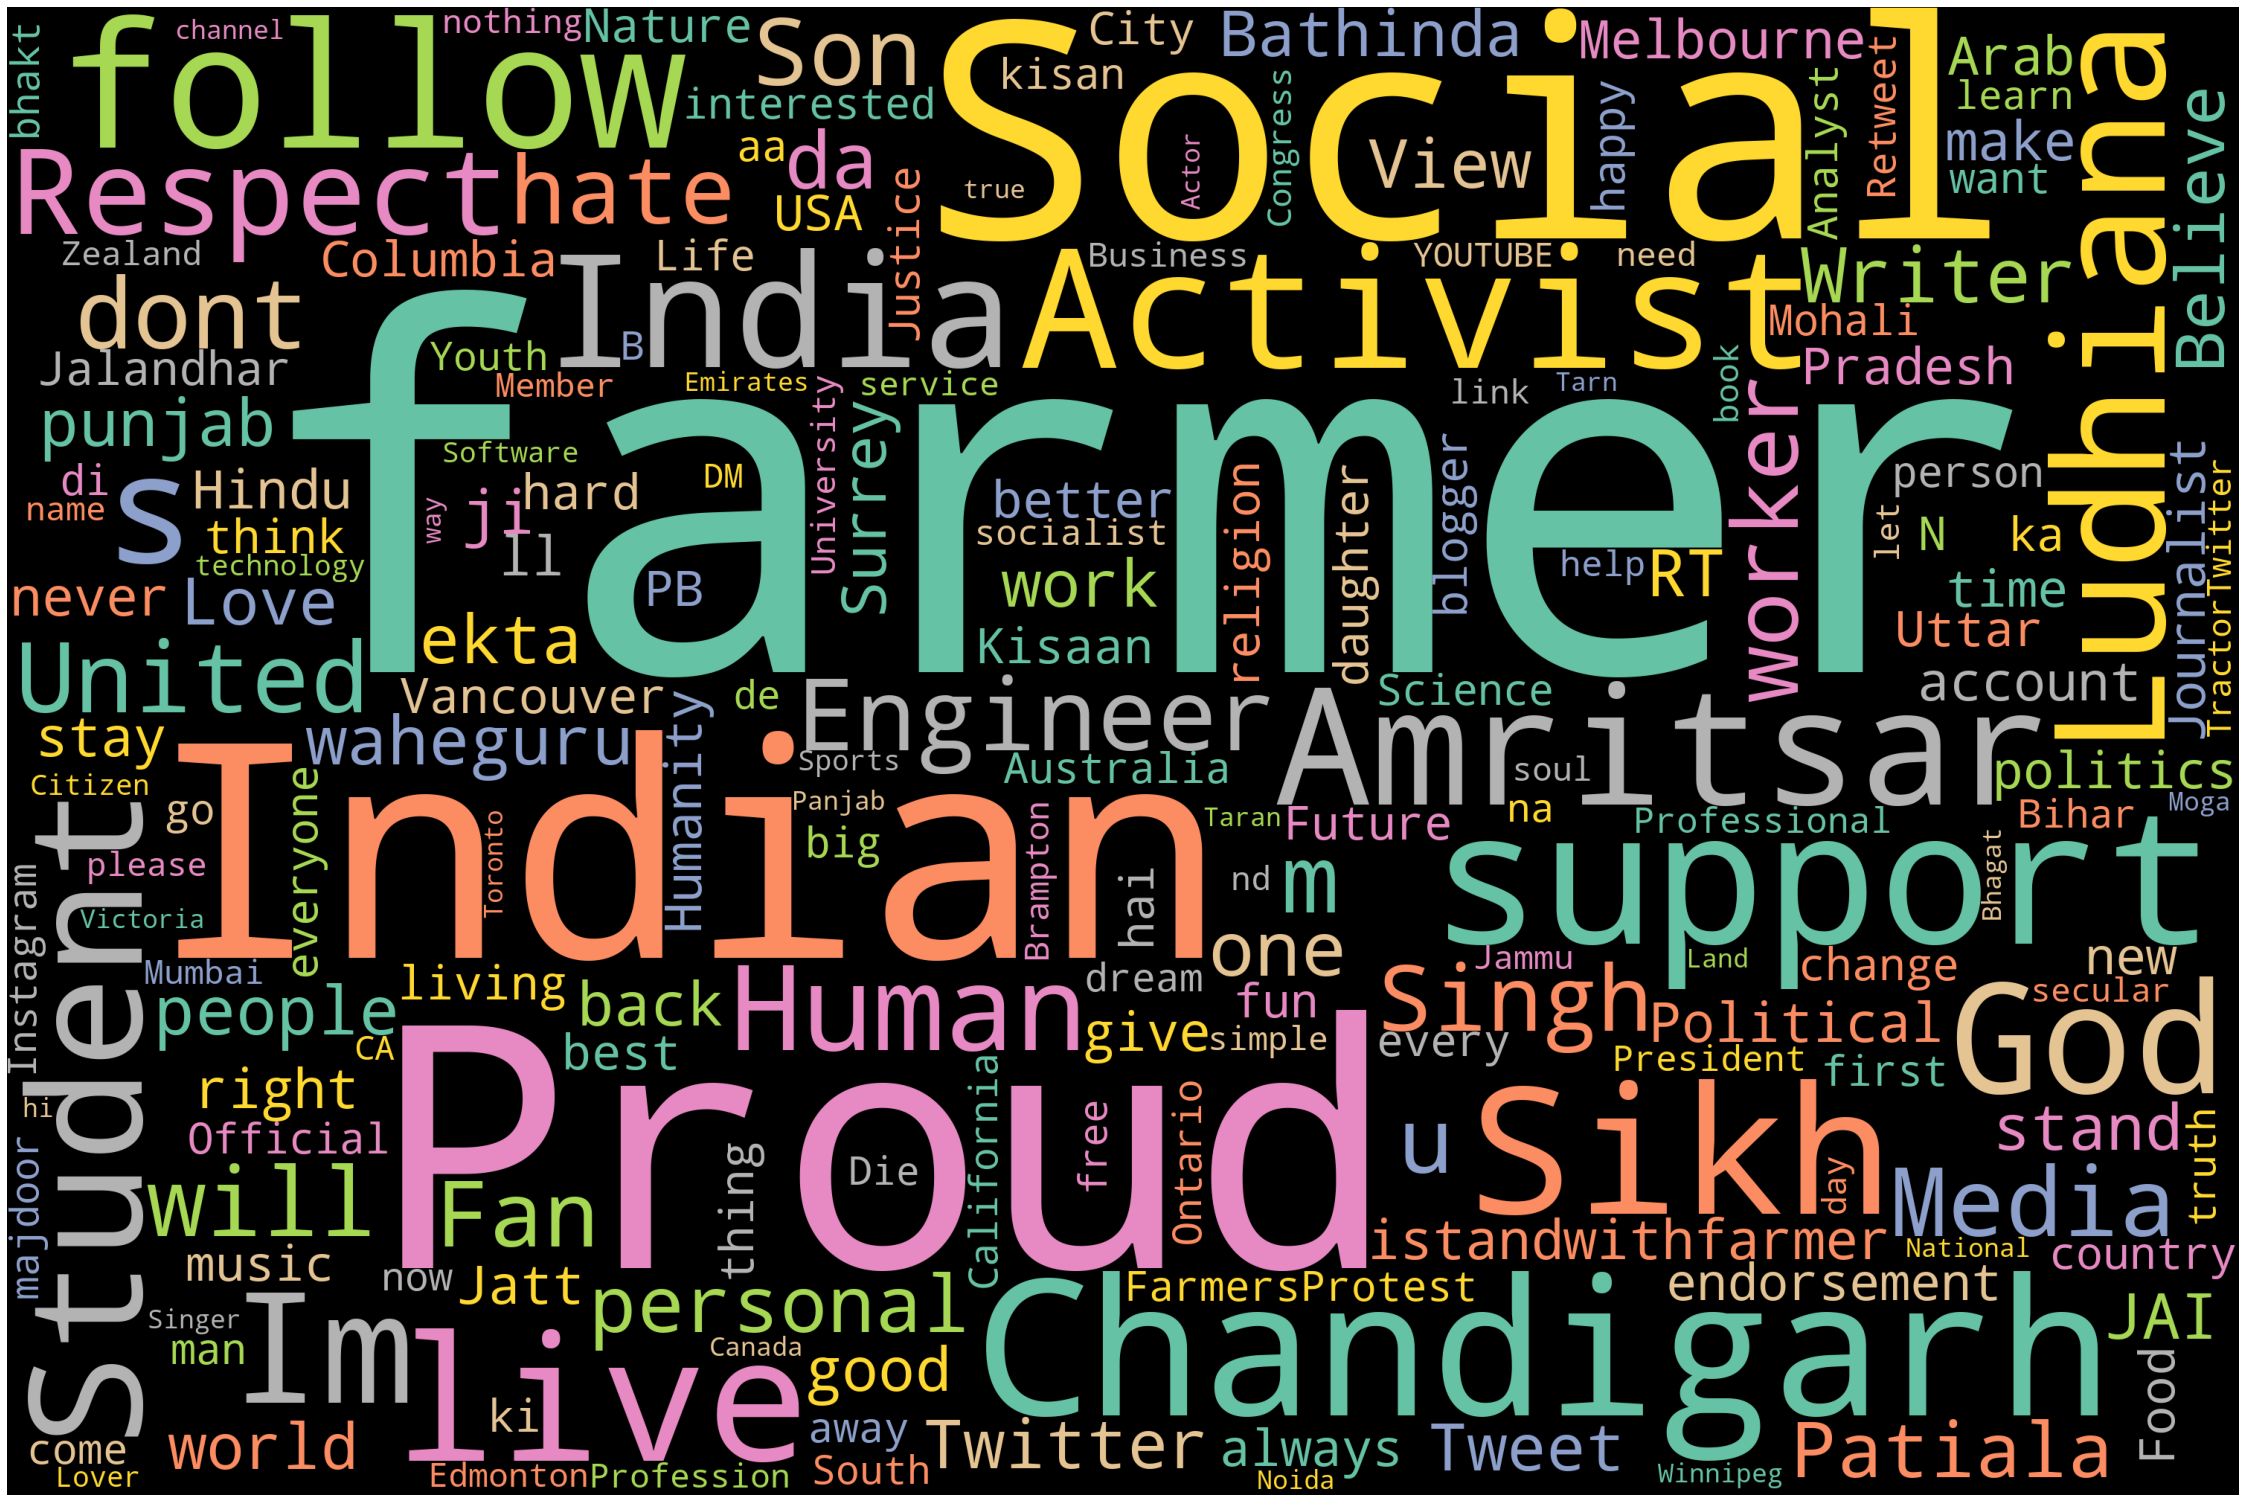

In [84]:
## Word Cloud for description of the friends
text = ""
for user in lll:
    text += user["description"]
text = clean_text(text)
text = ''.join([i for i in location_text if ((i.isalpha() and ord(i) < 127) or i == ' ')])
filtr = ["Punjab", "British", "Delhi", "love", "lover", "New", "life"]
for w in filtr:
    text = text.replace(w, '')
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False, stopwords = STOPWORDS, ).generate(text)

plot_cloud(wordcloud)
wordcloud.to_file(f"wordcloudff{hashtag}.png")

Words like Proud, Indian, farmer, Activist stand out when looking at the description of friends and followers of the users who used the hashtag

In [85]:
# fig = plt.figure(num=None, figsize=(5, 4), dpi=300, facecolor='w', edgecolor='k')
# ax = fig.add_axes([0,0,1,1])
# total = np.sum(np.array([scriptz[k] for k in scriptz]))
# x = [k for k in scriptz if scriptz[k] > 5000]
# x.append("Others")
# y = [scriptz[k] for k in scriptz if scriptz[k] > 5000]
# y.append(total - np.sum(np.array(y)))
# ax.pie(y,labels=x)
# plt.savefig('piechart-lang.png', bbox_inches = 'tight')
# plt.show()

In [ ]:
## HELPER FUNCTION TO GET FOLLOWERS
print(type(users_uniq))
for idx, user in enumerate(users_uniq):
    if idx <= 452:
        continue
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    try: 
        api = tw.API(auth, wait_on_rate_limit=True)
        c = api.friends(user["screen_name"])
    except:
        continue
    count = user["friends_count"]
    with open(f'userfriends2/friend-{idx}-{user["id"]}.json', 'w') as f:
        dada = {}
        dada["id"] = user["id"]
        ll = []
        for item in c:
            ll.append(item._json)
        dada["users"] = ll
        json.dump(dada, f)
    if idx % 10 == 0:
        print(idx)

<class 'list'>
460
